In [ ]:
#Module installs

!pip install lazypredict scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install sklearn
!pip install openpyxl
!pip install graphviz

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Preprocessing

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Dataset _cleaned.xlsx to Dataset _cleaned.xlsx


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel("Dataset _cleaned.xlsx")

In [ ]:
df.head()

# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

duplicates = df.duplicated()
print("Duplicates:\n",duplicates)\

#####The following code counts the duplicates and removes the duplicates and null values######

# Count duplicates
duplicate_count = df.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_count)
# Remove duplicates
df_no_duplicates = df.drop_duplicates()
print("DataFrame after removing duplicates:\n", df_no_duplicates)

# Remove rows with any null values
df_no_nulls = df.dropna()
print("DataFrame after removing rows with null values:\n",df_no_nulls)


Missing Values in Each Column:
Ciluba        0
FRANCAIS      0
ENGLISH       0
Afrikaans     2
Sepedi        5
Zulu          1
SCORE         0
SENTIMENT     0
NATURE        0
dtype: int64
Duplicates:
 0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool
Number of duplicate rows: 46
DataFrame after removing duplicates:
          Ciluba    FRANCAIS      ENGLISH  Afrikaans           Sepedi  \
0         Akaja     Arrangé      Arrange        Reël        Beakanya   
1     Akajilula  Réarranger    Rearrange     Herreël        Beakanya   
2         Akula       Parlé        Speak       Praat          Bolela   
3       Akulula    Reparler  Speak again  Praat weer     Bolela gape   
4         Aluja    Remettre       Return   Terugkeer           Boela   
...         ...         ...          ...         ...             ...   
2995    Tudi ne      elle a      she has      s

In [ ]:
# Print the shape after dropping duplicates
print("Shape after dropping duplicates (rows, columns):", df_no_duplicates.shape)

# Ensure columns are named correctly
df.columns = ['Ciluba', 'FRANCAIS', 'English', 'Afrikaans', 'Sepedi', 'Zulu', 'SCORE', 'SENTIMENT', 'NATURE']

# IDENTIFY ROWS WITH MISMATCH BETWEEN SCORE AND SENTIMENT
# Positive score but negative sentiment
positive_score_negative_sentiment = df[(df['SCORE'] > 0) & (df['SENTIMENT'] == 'Negatif')]

# Negative score but positive sentiment
negative_score_positive_sentiment = df[(df['SCORE'] < 0) & (df['SENTIMENT'] == 'Positif')]

# Combine both conditions
mismatch_rows = pd.concat([positive_score_negative_sentiment, negative_score_positive_sentiment])

# Get the row indices (row numbers)
row_indices = mismatch_rows.index.tolist()

# Display the row numbers and corresponding data
print("Rows with mismatched score and sentiment:")
print(mismatch_rows)
print("\nRow numbers (indices):", row_indices)

Shape after dropping duplicates (rows, columns): (2954, 9)
Rows with mismatched score and sentiment:
          Ciluba      FRANCAIS       English  Afrikaans     Sepedi      Zulu  \
351  disengelela  supplication  supplication  Smeekbede  Dikgopelo  ukunxusa   
432      kunyema          fuir          flee      Vlugt     tshaba    baleka   
503    kuimansha        jetter    throw away    weggooi      lahla     lahla   

     SCORE SENTIMENT NATURE  
351      3   Negatif    Mot  
432      2   Negatif  Verbe  
503      3   Negatif  Verbe  

Row numbers (indices): [351, 432, 503]


In [ ]:
df = pd.read_excel("Dataset _cleaned.xlsx")

# List of row indices with mismatched scores and sentiment
row_indices = [70, 75, 101, 108, 113, 116, 132, 139, 154, 181, 182, 191, 213, 226, 230, 275,
               306, 307, 405, 451, 465, 483, 484, 485, 498, 502, 591, 593, 595, 599, 601, 1686,
               15, 19, 35, 36, 48, 66, 202, 214, 1469]

# Loop through each index and correct the mismatched rows
for index in row_indices:
    score = df.at[index, 'SCORE']
    sentiment = df.at[index, 'SENTIMENT']

    # Correct the sentiment based on the score
    if score > 0 and sentiment == 'Negatif':
        df.at[index, 'SENTIMENT'] = 'Positif'
    elif score < 0 and sentiment == 'Positif':
        df.at[index, 'SENTIMENT'] = 'Negatif'

# Save the modified DataFrame back to the Excel file
#df.to_excel(file_path, index=False)

print("The sentiment values have been updated based on the score.")

The sentiment values have been updated based on the score.


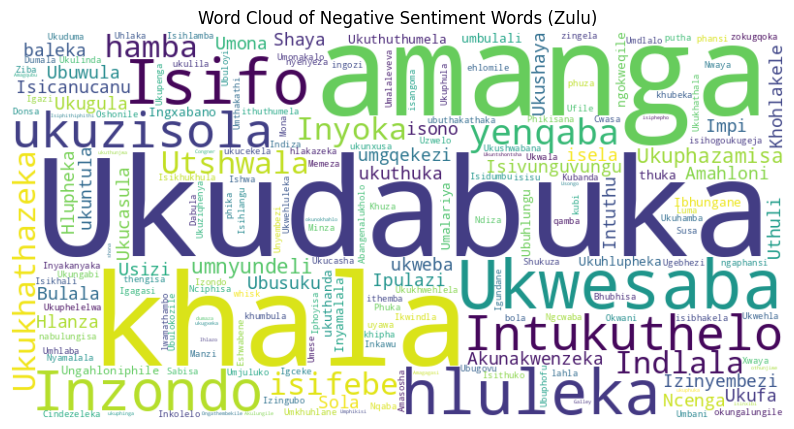

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Ensure columns are named correctly
df.columns = ['Ciluba', 'FRANCAIS', 'English', 'Afrikaans', 'Sepedi', 'Zulu', 'SCORE', 'SENTIMENT', 'NATURE']

# Filter for negative sentiment words
negative_words = df[df['SENTIMENT'] == 'Negatif']['Zulu']  # Assuming sentiment is labeled in 'SENTIMENT' column

# Convert the negative words to a single string for the word cloud
negative_text = ' '.join(negative_words.astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Negative Sentiment Words (Zulu)')
plt.show()


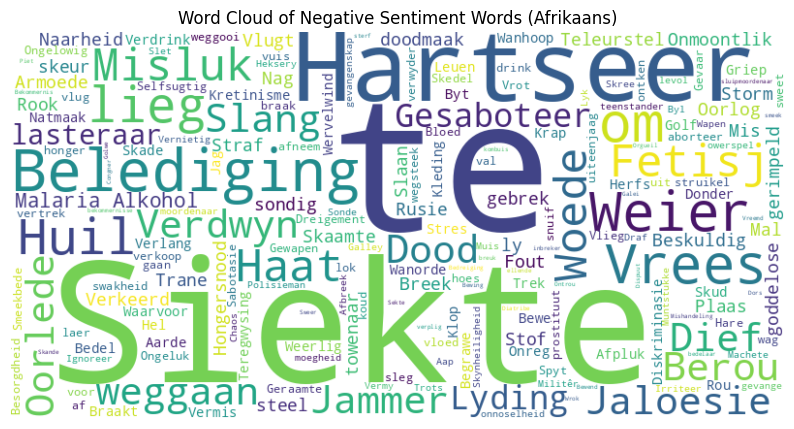

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Ensure columns are named correctly
df.columns = ['Ciluba', 'FRANCAIS', 'English', 'Afrikaans', 'Sepedi', 'Zulu', 'SCORE', 'SENTIMENT', 'NATURE']

# Filter for negative sentiment words
negative_words = df[df['SENTIMENT'] == 'Negatif']['Afrikaans']  # Assuming sentiment is labeled in 'SENTIMENT' column

# Convert the negative words to a single string for the word cloud
negative_text = ' '.join(negative_words.astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Negative Sentiment Words (Afrikaans)')
plt.show()

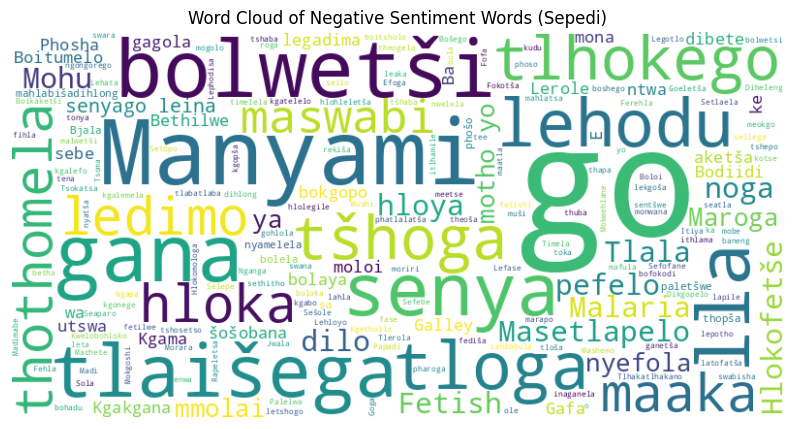

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Ensure columns are named correctly
df.columns = ['Ciluba', 'FRANCAIS', 'English', 'Afrikaans', 'Sepedi', 'Zulu', 'SCORE', 'SENTIMENT', 'NATURE']

# Filter for negative sentiment words
negative_words = df[df['SENTIMENT'] == 'Negatif']['Sepedi']  # Assuming sentiment is labeled in 'SENTIMENT' column

# Convert the negative words to a single string for the word cloud
negative_text = ' '.join(negative_words.astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Negative Sentiment Words (Sepedi)')
plt.show()

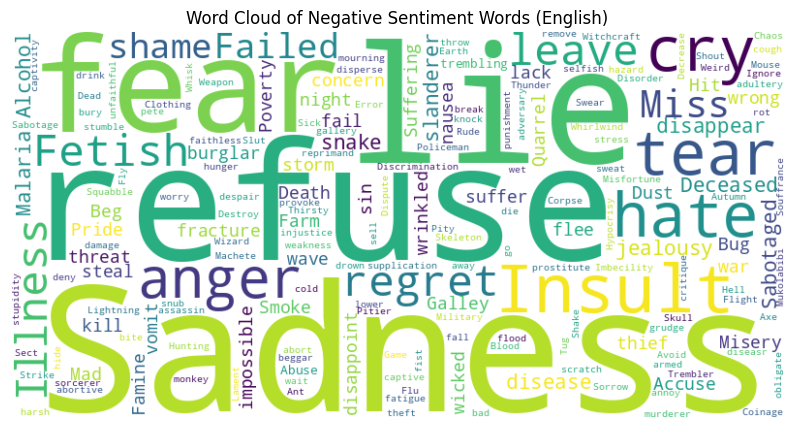

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Ensure columns are named correctly
df.columns = ['Ciluba', 'FRANCAIS', 'English', 'Afrikaans', 'Sepedi', 'Zulu', 'SCORE', 'SENTIMENT', 'NATURE']

# Filter for negative sentiment words
negative_words = df[df['SENTIMENT'] == 'Negatif']['English']  # Assuming sentiment is labeled in 'SENTIMENT' column

# Convert the negative words to a single string for the word cloud
negative_text = ' '.join(negative_words.astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Negative Sentiment Words (English)')
plt.show()

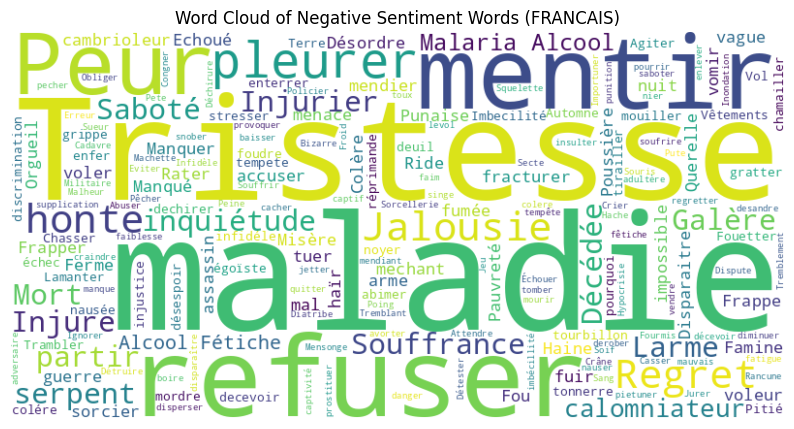

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Ensure columns are named correctly
df.columns = ['Ciluba', 'FRANCAIS', 'English', 'Afrikaans', 'Sepedi', 'Zulu', 'SCORE', 'SENTIMENT', 'NATURE']

# Filter for negative sentiment words
negative_words = df[df['SENTIMENT'] == 'Negatif']['FRANCAIS']  # Assuming sentiment is labeled in 'SENTIMENT' column

# Convert the negative words to a single string for the word cloud
negative_text = ' '.join(negative_words.astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Negative Sentiment Words (FRANCAIS)')
plt.show()

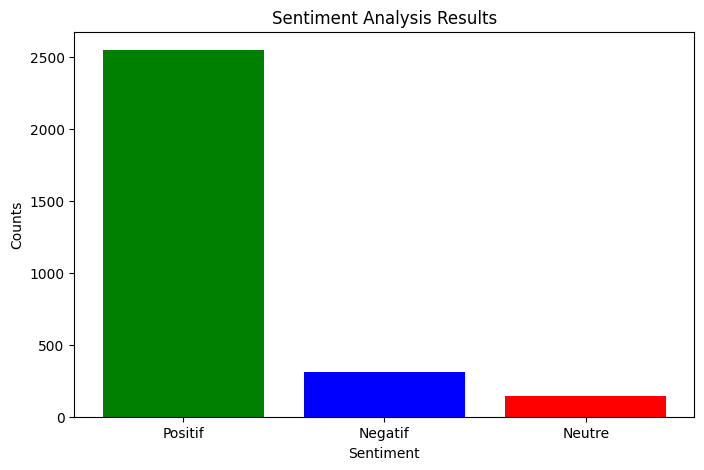

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['SENTIMENT'].value_counts()

# Plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()


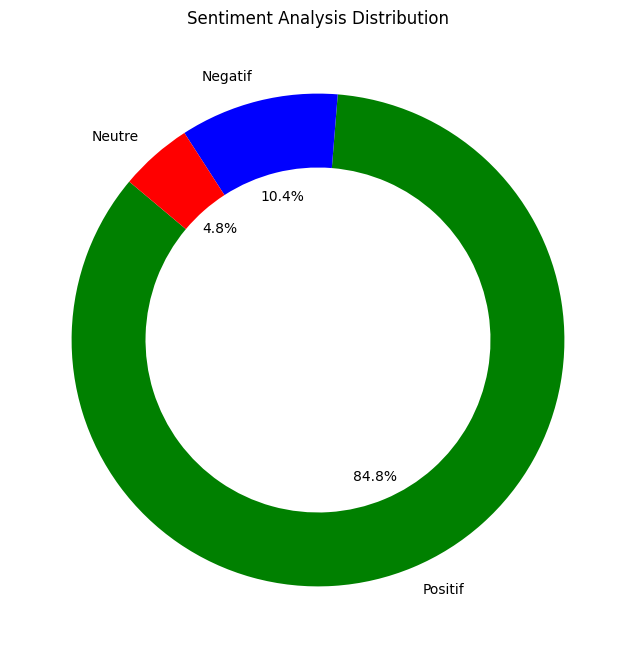

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['SENTIMENT'].value_counts()

# Plot using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',   # Display percentages
    startangle=140,      # Start angle for better distribution
    colors=['green', 'blue', 'red'],  # Customize colors
    wedgeprops={'width': 0.3}  # Width parameter to create the donut hole
)

# Add a title
plt.title('Sentiment Analysis Distribution')
plt.show()


In [ ]:
##The following code identifies the gram analysis and calculates the lexical diversity per language####
from collections import Counter
from nltk.util import ngrams

# Load the data
df = pd.read_excel("Dataset _cleaned.xlsx")

print (df.head())
# Perform n-gram analysis for each language
for col in ['ENGLISH', 'FRANCAIS', 'Sepedi', 'Zulu']:
    words = df[col].str.split().explode().tolist()
    # Generate 2-grams
    bigrams = list(ngrams(words, 2))
    bigram_counts = Counter(bigrams)
    top_bigrams = bigram_counts.most_common(20)
    print(f'Top 20 Bigrams in {col}:')
    for bigram, count in top_bigrams:
        print(f'{" ".join(bigram)}: {count}')

    # Calculate lexical diversity (the ratio of unique words to the total number of words) for each language
for col in ['ENGLISH', 'FRANCAIS','Sepedi', 'Zulu']:
    unique_words = df[col].str.split().explode().unique().shape[0]
    total_words = df[col].str.split().explode().shape[0]
    lexical_diversity = unique_words / total_words
    print(f'Lexical Diversity in {col}: {lexical_diversity:.2f}')

      Ciluba    FRANCAIS      ENGLISH  Afrikaans        Sepedi  \
0      Akaja     Arrangé      Arrange        Reël     Beakanya   
1  Akajilula  Réarranger    Rearrange     Herreël     Beakanya   
2      Akula       Parlé        Speak       Praat       Bolela   
3    Akulula    Reparler  Speak again  Praat weer  Bolela gape   
4      Aluja    Remettre       Return   Terugkeer        Boela   

             Zulu  SCORE SENTIMENT NATURE  
0          Hlela       1   Positif  Verbe  
1   hlela kabusha      1   Positif  Verbe  
2         Khuluma      2   Positif  Verbe  
3  Khuluma futhi       2   Positif  Verbe  
4       Buyisela       3   Positif  Verbe  
Top 20 Bigrams in ENGLISH:
seventy one: 9
one seventy: 8
to walk: 5
bush drinker: 5
drinker calm: 5
give birth: 4
sit down: 4
ardor aspect: 4
stock exchange: 4
exchange branch: 4
sadness anger: 3
to grow: 3
wake up: 3
to sit: 3
to do: 3
sheet metal: 3
To go: 3
To kiss: 3
Malaria Alcohol: 3
Money Mother: 3
Top 20 Bigrams in FRANCAIS:
sept

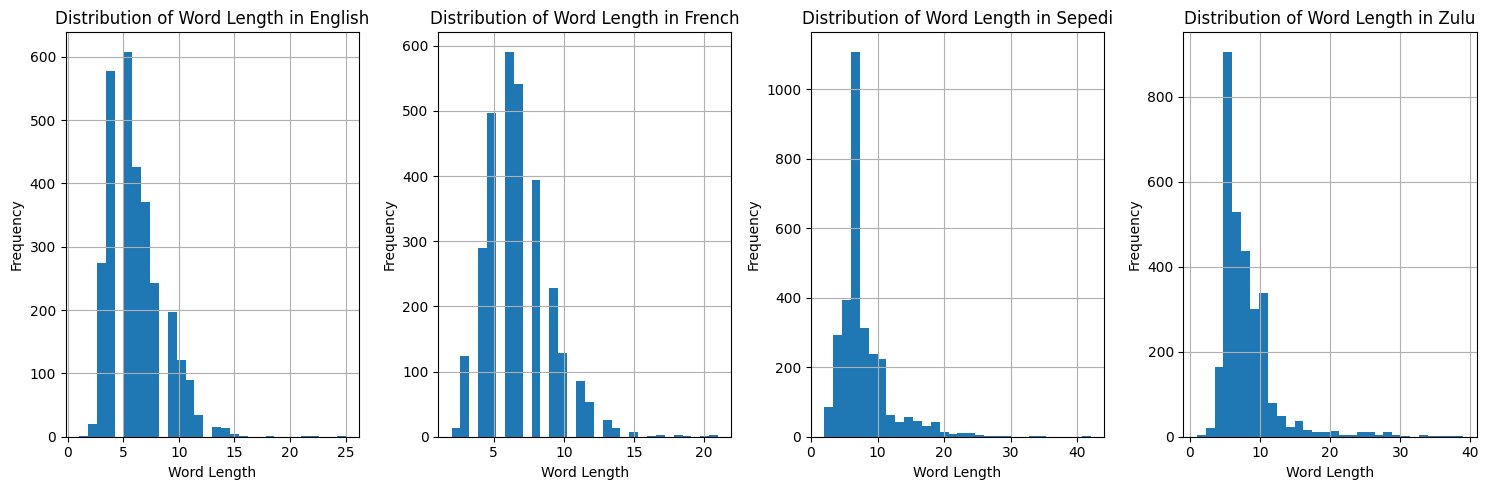

In [ ]:
#for understanding the linguistic properties of your dataset and identifying any differences or similarities between the language columns.
#easy to compare the characteristics of the word lengths across the different languages.
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# Load the data
df = pd.read_excel("Dataset _cleaned.xlsx")
# Calculate the word length for the 'English', 'French', and 'Sepedi' columns
df['English_word_length'] = df['ENGLISH'].str.len()
df['French_word_length'] = df['FRANCAIS'].str.len()
df['Sepedi_word_length'] = df['Sepedi'].str.len()
df['Zulu_word_length'] = df['Zulu'].str.len()

# Create the figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot the histograms
df['English_word_length'].hist(ax=axes[0], bins=30)
axes[0].set_title('Distribution of Word Length in English')
axes[0].set_xlabel('Word Length')
axes[0].set_ylabel('Frequency')

df['French_word_length'].hist(ax=axes[1], bins=30)
axes[1].set_title('Distribution of Word Length in French')
axes[1].set_xlabel('Word Length')
axes[1].set_ylabel('Frequency')

df['Sepedi_word_length'].hist(ax=axes[2], bins=30)
axes[2].set_title('Distribution of Word Length in Sepedi')
axes[2].set_xlabel('Word Length')
axes[2].set_ylabel('Frequency')

df['Zulu_word_length'].hist(ax=axes[3], bins=30)
axes[3].set_title('Distribution of Word Length in Zulu')
axes[3].set_xlabel('Word Length')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# translation and sentiment analyis


In [ ]:
import pandas as pd
import string


# Load the dataset
df = pd.read_excel('/content/Dataset _cleaned.xlsx')

# Ensure columns are named correctly with additional SA languages
df.columns = ['ciluba', 'french', 'english', 'afrikaans','sepedi', 'isizulu', 'score', 'sentiment', 'nature']


# Remove punctuation from the French words and convert them to lowercase
df['french'] = df['french'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
df['english'] = df['english'].str.lower().str.translate(str.maketrans('', '', string.punctuation))


# Create translation and scoring dictionaries from the dataset/lexicon
translation_lexique = dict(zip(df['english'].str.lower(), df['sepedi']))
lexique = dict(zip(df['sepedi'].str.lower(), df['score']))


def analyse_sentiment(text):
    words = text.lower().split()
    word_scores = {word: lexique.get(word, 0) for word in words}
    score = sum(word_scores.values())
    if score > 0.05:
        sentiment = "Positif"
    elif score < -0.05:
        sentiment = "Négatif"
    else:
        sentiment = "Neutre"
    return score, sentiment, word_scores

# Display the first few rows of the dataset
print(df.head())

      ciluba      french      english   afrikaans       sepedi  \
0      Akaja     arrangé      arrange        Reël     Beakanya   
1  Akajilula  réarranger    rearrange     Herreël     Beakanya   
2      Akula       parlé        speak       Praat       Bolela   
3    Akulula    reparler  speak again  Praat weer  Bolela gape   
4      Aluja    remettre       return   Terugkeer        Boela   

          isizulu  score sentiment nature  
0          Hlela       1   Positif  Verbe  
1   hlela kabusha      1   Positif  Verbe  
2         Khuluma      2   Positif  Verbe  
3  Khuluma futhi       2   Positif  Verbe  
4       Buyisela       3   Positif  Verbe  


In [ ]:
import string

# Load the Excel file and specify the column containing the French text
sentences_text_df = pd.read_excel('/content/Sentences dataset.xlsx')

# Assuming the column containing English text. the column that will be the source of the translation of the sentences'
sentence_texts = sentences_text_df['ENGLISH']

def find_closest_translation(word, lexicon):
    #Return the first matching translation from lexicon if exact word is not found.
    # If the word is in the lexicon, return its translation
    if word in lexicon:
        return lexicon[word]

    # If not, check for words in the lexicon that contain this word
    for key in lexicon.keys():
        if word in key:
            return lexicon[key]  # Return the first match found

    # If no matches are found, return the word as-is
    return word

def translate_text_using_lexicon(text, translation_lexique):
    # Split sentence into words, clean punctuation, and translate each word
    words = text.lower().split()  # Split the sentence into individual words
    translated_words = []

    for word in words:
        # Remove punctuation from word
        clean_word = word.translate(str.maketrans('', '', string.punctuation))

        # Get translation or keep the word unchanged if not found
        translated_word = translation_lexique.get(clean_word, clean_word)

        # Append the translated word (or original if not found) to the list
        translated_words.append(translated_word)

   # Capitalize the first word, ensure others are in lowercase
    if translated_words:
        translated_words[0] = translated_words[0].capitalize()
        translated_text = ' '.join([translated_words[0]] + [word.lower() for word in translated_words[1:]])
    else:
        translated_text = ''  # If there are no words, return an empty string

    return translated_text


# Translate each sentence in the column using the lexicon
translated_texts = sentence_texts.apply(lambda text: translate_text_using_lexicon(text, translation_lexique))

# Analyze sentiment for each translated sentence
results = []
for translated_text in translated_texts:
    total_score, sentiment, word_scores = analyse_sentiment(translated_text)
    results.append({
        "Translated Text": translated_text,
        "Total Score": total_score,
        "Sentiment": sentiment,
        "Word Scores": word_scores
    })

# Convert results into a DataFrame for better display
results_df = pd.DataFrame(results)

# Display the DataFrame in a tabular format
print(results_df)

# Optionally, save the results to an Excel or CSV file
results_df.to_excel("translated_results.xlsx", index=False)  # Save as Excel



                 Translated Text  Total Score Sentiment  \
0    Tlhakatlhakano kwelobohloko           -1   Négatif   
1                 Setlaela hloya          -10   Négatif   
2          Go ferekanya go hloka            0    Neutre   
3                 Hloya go hloka           -7   Négatif   
4             Kwelobohloko betha            4   Positif   
..                           ...          ...       ...   
994             Sepela on lefase            4   Positif   
995            Sega ka ntle loud            5   Positif   
996   Go hwetša gape the bonnete            5   Positif   
997         Nna lerato wena papa            8   Positif   
998       Nna lerato wena sister            5   Positif   

                                           Word Scores  
0            {'tlhakatlhakano': -3, 'kwelobohloko': 2}  
1                        {'setlaela': -3, 'hloya': -7}  
2                {'go': 0, 'ferekanya': 0, 'hloka': 0}  
3                   {'hloya': -7, 'go': 0, 'hloka': 0}  
4     

Lazy Predict Code

 97%|█████████▋| 30/31 [00:01<00:00, 21.79it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 1500, number of used features: 2
[LightGBM] [Info] Start training from score -5.233779
[LightGBM] [Info] Start training from score -7.313220
[LightGBM] [Info] Start training from score -7.313220
[LightGBM] [Info] Start training from score -0.431809
[LightGBM] [Info] Start training from score -3.624341
[LightGBM] [Info] Start training from score -7.313220
[LightGBM] [Info] Start training from score -7.313220
[LightGBM] [Info] Start training from score -1.166891
[LightGBM] [Info] Start training from score -5.367310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

100%|██████████| 31/31 [00:02<00:00, 12.68it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
LinearDiscriminantAnalysis       1.00               0.86    None      1.00   
DecisionTreeClassifier           1.00               0.86    None      1.00   
GaussianNB                       1.00               0.71    None      1.00   
SVC                              1.00               0.71    None      1.00   
BaggingClassifier                1.00               0.71    None      1.00   
LabelSpreading                   1.00               0.71    None      1.00   
LabelPropagation                 1.00               0.71    None      1.00   
KNeighborsClassifier             1.00               0.71    None      1.00   
LGBMClassifier                   1.00               0.71    None      1.00   
ExtraTreesClassifier             1.00               0.71    None      1.00   
ExtraTreeClassifier              1.00               0.71    None

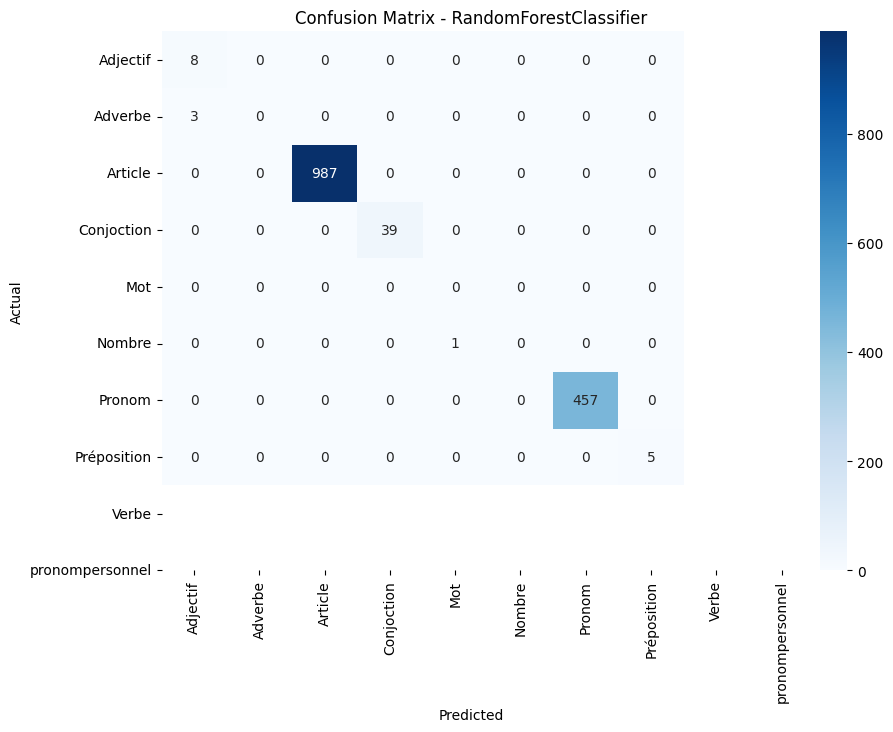

In [ ]:
#Lazy Predict code
!pip install lazypredict
!pip install scikit-learn

# Step 2: Modify the Supervised.py file to change 'sparse' to 'sparse_output'
!sed -i 's/sparse=False/sparse_output=False/g' /usr/local/lib/python3.10/dist-packages/lazypredict/Supervised.py

import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_excel('/content/Dataset _cleaned.xlsx')  # Absolute path or corrected file name
df2 = pd.DataFrame(df)
# Set the columns
df.columns = ['CILUBA','FRANCAIS','ENGLISH','AFRIKAANS','SEPEDI','ZULU','SCORE','SENTIMENT','NATURE']
df2

# EDA to replace misspelled words and drop duplicates
df['NATURE'] = df['NATURE'].str.replace('préposition', 'Préposition')
df_cleaned = df.drop_duplicates()

# Check for missing values and handle them (e.g., dropping or filling)
#df = df.dropna()  # Alternatively, you can use df.fillna() for filling missing values

# Convert categorical features to numeric (if necessary)
# Assuming 'NATURE' is a categorical target variable and others might need encoding
le = LabelEncoder()
df['NATURE'] = le.fit_transform(df['NATURE'])

# Select feature columns and the target column
X = df[['CILUBA','FRANCAIS','ENGLISH','AFRIKAANS','SEPEDI','ZULU','SCORE','SENTIMENT','NATURE']]
y = df['NATURE']

# Ensure all feature columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle any remaining NaN values after conversion
#X = X.fillna(0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print model performance
print(models)

# Use RandomForestClassifier for confusion matrix as an example
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()

# LSTM Model Code



Saving Dataset _cleaned.xlsx to Dataset _cleaned (1).xlsx
Epoch 1/10
24/24 - 9s - 370ms/step - accuracy: 0.6220 - loss: 1.2925 - val_accuracy: 0.6580 - val_loss: 0.8397
Epoch 2/10
24/24 - 10s - 416ms/step - accuracy: 0.6507 - loss: 0.8131 - val_accuracy: 0.6613 - val_loss: 0.7800
Epoch 3/10
24/24 - 11s - 461ms/step - accuracy: 0.6793 - loss: 0.7472 - val_accuracy: 0.6913 - val_loss: 0.7000
Epoch 4/10
24/24 - 7s - 281ms/step - accuracy: 0.7867 - loss: 0.6101 - val_accuracy: 0.7960 - val_loss: 0.5732
Epoch 5/10
24/24 - 9s - 364ms/step - accuracy: 0.9007 - loss: 0.3890 - val_accuracy: 0.8227 - val_loss: 0.4938
Epoch 6/10
24/24 - 7s - 299ms/step - accuracy: 0.9287 - loss: 0.2520 - val_accuracy: 0.8373 - val_loss: 0.5229
Epoch 7/10
24/24 - 9s - 358ms/step - accuracy: 0.9420 - loss: 0.2085 - val_accuracy: 0.8333 - val_loss: 0.5322
Epoch 8/10
24/24 - 10s - 420ms/step - accuracy: 0.9500 - loss: 0.1729 - val_accuracy: 0.8060 - val_loss: 0.5978
Epoch 9/10
24/24 - 10s - 421ms/step - accuracy: 0.9

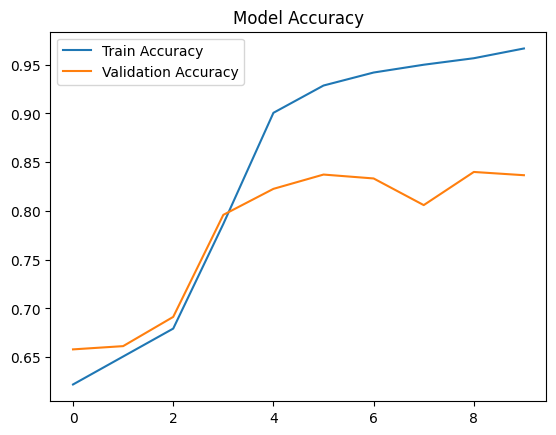

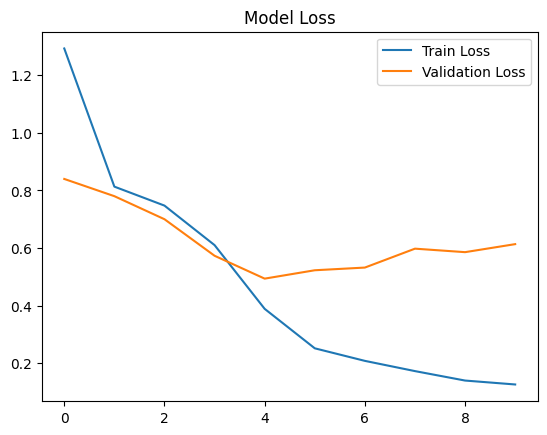

In [ ]:
import pandas as pd
from google.colab import files
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
import matplotlib.pyplot as plt

# Upload the file if it hasn't been uploaded
uploaded = files.upload()

# Load the DataFrame
df = pd.read_excel('/content/Dataset _cleaned.xlsx')

# Ensure column names are correct
df.columns = ['CILUBA', 'FRANCAIS', 'ENGLISH', 'AFRIKAANS', 'SEPEDI', 'ZULU', 'SCORE', 'SENTIMENT', 'NATURE']

# Encode the 'NATURE' target column
le = LabelEncoder()
df['NATURE'] = le.fit_transform(df['NATURE'])
y = to_categorical(df['NATURE'])  # One-hot encoding for multi-class classification

# Combine text columns for input
df['text_combined'] = df[['CILUBA', 'FRANCAIS', 'ENGLISH', 'AFRIKAANS', 'SEPEDI', 'ZULU']].astype(str).agg(' '.join, axis=1)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text_combined'])
X = tokenizer.texts_to_sequences(df['text_combined'])
X = pad_sequences(X, maxlen=100)  # Set maxlen based on average sequence length

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Define the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(y.shape[1], activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate and visualize
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


# Machine Learning Models

Support Vector Machine

Accuracy of SVM: 0.665
Classification report of SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.67      0.99      0.80       383
           5       0.53      1.00      0.69        18
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00       187
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1

    accuracy                           0.67       600
   macro avg       0.13      0.22      0.17       600
weighted avg       0.45      0.67      0.53       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


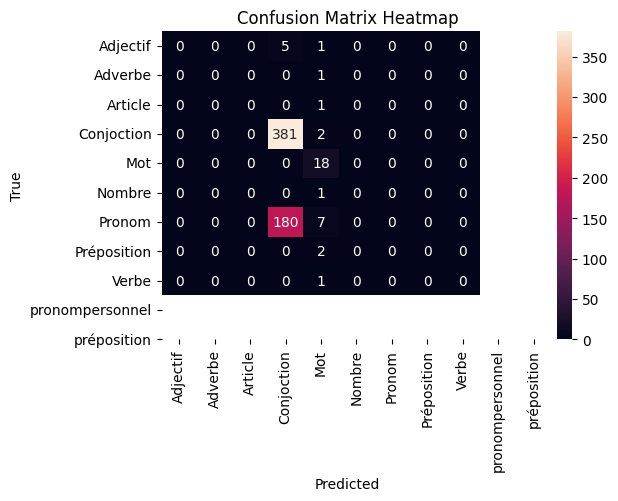

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel ('/content/Dataset _cleaned.xlsx')

#Encoding categorical features
label_encoder_nature = LabelEncoder()
df['NATURE'] = label_encoder_nature.fit_transform(df['NATURE'])

label_encoder_sentiment = LabelEncoder()
df['SENTIMENT'] = label_encoder_sentiment.fit_transform(df['SENTIMENT'])


#Feature selection
X = df[['SCORE', 'SENTIMENT']]
y = df['NATURE']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

#Training the model
svm_model.fit(X_train, y_train)

#Making predictions
y_pred = svm_model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM: {accuracy}")

#Classification report
print("Classification report of SVM:")
print(classification_report(y_test, y_pred))

#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=label_encoder_nature.classes_, yticklabels=label_encoder_nature.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Machine learning
The reason for predicting sentiment based on the score:

!!!!!!DONT COPY AND PASTE

1. Understanding Sentiment in Data
Binary Sentiment Classification: By using a score (in this case, the 'SCORE' column) to create a binary sentiment classification (positive vs. not positive), you can simplify the problem. This allows you to easily classify data points based on a threshold, making it easier to analyze and interpret.
Positive vs. Negative Sentiment: In your case, a score greater than 1 is considered positive sentiment, while a score of 1 or lower indicates non-positive sentiment. This dichotomy helps in understanding the general sentiment trends in the dataset.
2. Predictive Modeling
Feature Representation: Sentiment prediction can be used as a feature in various applications, such as customer feedback analysis, social media sentiment analysis, and product reviews. This information can inform decisions based on customer perceptions.
Machine Learning Applications: Using scores as a target variable allows you to apply machine learning algorithms, such as Random Forests, to predict sentiment based on textual or categorical features (like translations in different languages). The model learns patterns in the data that correlate with positive or negative sentiment.
3. Applications in Real-world Scenarios
Customer Feedback Analysis: Businesses can analyze customer feedback to understand satisfaction levels. For example, feedback with a score of 2 or 3 may indicate positive sentiment, guiding business strategies and improvements.
Market Research: Understanding sentiment can help companies gauge public opinion about products or services, allowing them to adapt marketing strategies effectively.
Sentiment Tracking Over Time: By predicting sentiment based on scores, organizations can track changes in customer sentiment over time, helping to identify trends and evaluate the impact of changes in products or services.
4. Improving Model Performance
Enhanced Interpretability: When working with sentiment analysis, binary classification can lead to better interpretability of the model's predictions. Stakeholders can more easily understand the outcomes and implications of the model's predictions.
Focusing on Key Insights: By focusing on binary sentiment derived from scores, you can concentrate on the most relevant insights, such as which features contribute most to positive or negative sentiments.

      Ciluba    FRANCAIS      ENGLISH  Afrikaans        Sepedi  \
0      Akaja     Arrangé      Arrange        Reël     Beakanya   
1  Akajilula  Réarranger    Rearrange     Herreël     Beakanya   
2      Akula       Parlé        Speak       Praat       Bolela   
3    Akulula    Reparler  Speak again  Praat weer  Bolela gape   
4      Aluja    Remettre       Return   Terugkeer        Boela   

             Zulu  SCORE SENTIMENT NATURE  
0          Hlela       1   Positif  Verbe  
1   hlela kabusha      1   Positif  Verbe  
2         Khuluma      2   Positif  Verbe  
3  Khuluma futhi       2   Positif  Verbe  
4       Buyisela       3   Positif  Verbe  
Columns in DataFrame: ['Ciluba', 'FRANCAIS', 'ENGLISH', 'Afrikaans', 'Sepedi', 'Zulu', 'SCORE', 'SENTIMENT', 'NATURE']
Accuracy: 0.65
Precision: 0.66
Recall: 0.89

Classification Report:
              precision    recall  f1-score   support

Not Positive       0.57      0.24      0.34       338
    Positive       0.66      0.89      0.76

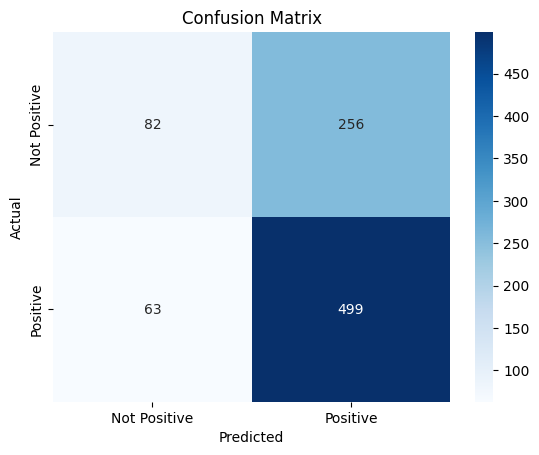

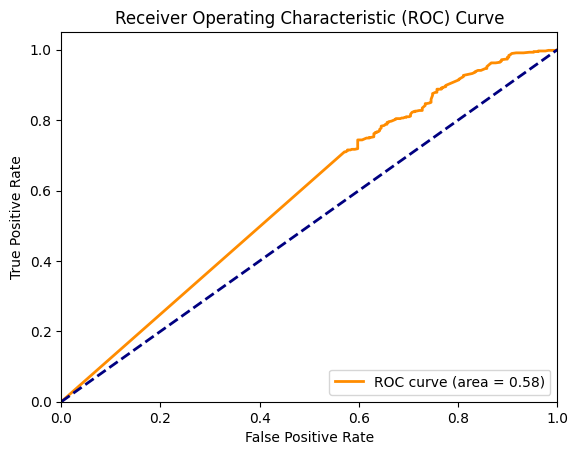

In [ ]:
#Random forest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# Load the dataset
file_name = 'Dataset _cleaned.xlsx'  # Use your file name
# Load the Excel file
df = pd.read_excel(file_name)
# Display the first few rows of the dataframe to inspect the data
print(df.head())

#1.Predict the sentiment based on the score
df.columns = df.columns.str.strip()

# Print the column names to verify
print("Columns in DataFrame:", df.columns.tolist())

# 1. Create a binary target variable for sentiment (positive or not)
# Creating sentiment binary based on SCORE
df['sentiment_binary'] = np.where(df['SCORE'] > 1, 1, 0)

# Check if 'Afrikaans' exists in DataFrame
if 'Afrikaans' not in df.columns:
    raise KeyError("The 'Afrikaans' column is not present in the DataFrame.")

# Features (using 'Afrikaans' as a sample feature, encoded)
X = pd.get_dummies(df['Afrikaans'].str.lower(), drop_first=True)  # One-hot encoding
y = df['sentiment_binary']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Positive', 'Positive']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Positive', 'Positive'], yticklabels=['Not Positive', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.65
Precision: 0.64
Recall: 0.98
F1 Score: 0.78

Classification Report:
              precision    recall  f1-score   support

Not Positive       0.73      0.10      0.18       338
    Positive       0.64      0.98      0.78       562

    accuracy                           0.65       900
   macro avg       0.69      0.54      0.48       900
weighted avg       0.68      0.65      0.55       900



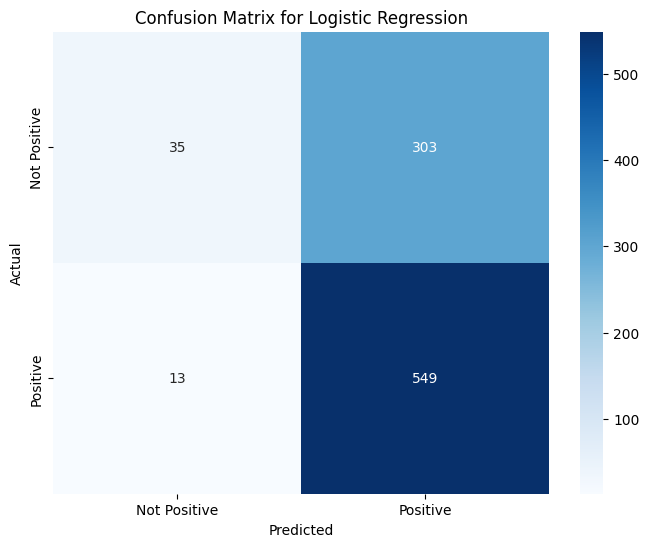

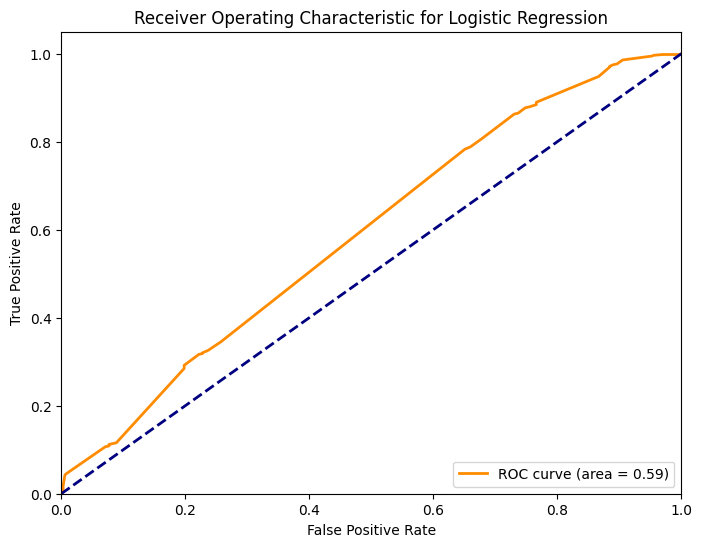

In [ ]:
#Logistic Regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Positive', 'Positive']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Positive', 'Positive'], yticklabels=['Not Positive', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Random forest using sentence dataset sentiment
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_excel("/content/Sentences dataset.xlsx")
print(df.columns)
# Ensure columns are named correctly
df.columns = ['Francais', 'English', 'Afrikaans', 'Sepedi', 'Zulu', 'Sentiment','Score_1']

# **Remove leading and trailing whitespace in the 'Sentiment' column**
df['Sentiment'] = df['Sentiment'].str.strip()

# Extract English sentences and sentiment as the feature and target variables
texts = df['Zulu']
target = df['Sentiment']

# Preprocess text: Remove punctuation and make lowercase
def preprocess_text(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return text

# Apply preprocessing to the text
texts = texts.apply(preprocess_text)

# Feature extraction using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# **Handle NaN values in the target variable**
# Drop rows with NaN values in 'Sentiment' column
df = df.dropna(subset=['Sentiment'])
df = df.dropna(subset=['Zulu'])

# Update texts and target after dropping NaN values
texts = df['Zulu'].apply(preprocess_text)
target = df['Sentiment']

X = vectorizer.fit_transform(texts) # Re-fit vectorizer

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Index(['French', 'ENGLISH', 'AFRIKAANS', 'SEPEDI', 'ZULU', 'SENTIMENT',
       'SCORE_1'],
      dtype='object')
Accuracy: 0.695
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.81      0.44      0.57        50
     Neutral       0.75      0.33      0.46        36
     Positif       0.67      0.92      0.77       114

    accuracy                           0.69       200
   macro avg       0.74      0.56      0.60       200
weighted avg       0.72      0.69      0.67       200



## **ML for Afrikaans and English Models**

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()


file_name = list(uploaded.keys())[0]


df = pd.read_excel(file_name)
df.head()

Saving New dataset.xlsx to New dataset.xlsx


,French,ENGLISH,AFRIKAANS,SEPEDI,ZULU,SENTIMENT,SCORE_1,Unnamed: 7
0,NaN,Disorder pity.,Wanorde jammer.,Tlhakatlhakano kwelobohloko.,Inyakanyaka isihawu,Negatif,1,NaN
1,NaN,Imbecility hate.,Imbesiliteit haat.,Setlaela lehloyo.,Ubuwula inzondo,Negatif,1,NaN
2,NaN,Shake miss.,Skud mis.,šikinya phoša,Shukuza nkosazana,Negatif,1,NaN
3,NaN,Hate miss.,Haat mis.,Lehloyo phoša,Inzondo nkosazana,Negatif,1,NaN
4,NaN,Pity hit.,Jammer tref.,Kwelobohloko e otla.,Isihawu shaya,Negatif,1,NaN


In [ ]:
import string

# Remove punctuation
df['ENGLISH_clean'] = df['ENGLISH'].str.lower().str.strip().str.translate(str.maketrans('', '', string.punctuation))
sentiment_scores_english = dict(zip(df['ENGLISH_clean'], df['SCORE_1']))

# Remove punctuation
df['AFRIKAANS_clean'] = df['AFRIKAANS'].str.lower().str.strip().str.translate(str.maketrans('', '', string.punctuation))
sentiment_scores_afrikaans = dict(zip(df['AFRIKAANS_clean'], df['SCORE_1']))

# Check
print("Score for 'hate miss' (English):", sentiment_scores_english.get("hate miss"))
print("Score for 'hou aan glimlag' (Afrikaans):", sentiment_scores_afrikaans.get("hou aan glimlag"))

Score for 'hate miss' (English): 1
Score for 'hou aan glimlag' (Afrikaans): 0


In [ ]:
#  English and Afrikaans
def analyse_sentiment(text, language="ENGLISH"):
    # Remove punctuation and convert to lowercase
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    word_scores = {}

    # Choose the correct dictionary based on language
    if language == "AFRIKAANS":
        chosen_dict = sentiment_scores_afrikaans
    else:
        chosen_dict = sentiment_scores_english


    phrase = ' '.join(words)
    if phrase in chosen_dict:
        word_scores[phrase] = chosen_dict[phrase]
        total_score = chosen_dict[phrase]
    else:

        word_scores = {word: chosen_dict.get(word, 0) for word in words}
        total_score = sum(word_scores.values())

    # Score
    if total_score == 0:
        sentiment = "Positive"
    elif total_score == 1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return total_score, sentiment, word_scores

# Sample test sentences in both English and Afrikaans
test_sentences = [
    ("Hate miss.", "ENGLISH"),
    ("Disorder pity.", "ENGLISH"),
    ("Hou aan glimlag.", "AFRIKAANS"),
    ("Hou styf vas.", "AFRIKAANS")
]

# Loop through each sentence, analyze it, and store the results
test_results = []

for sentence, language in test_sentences:
    # result
    score, sentiment, word_scores = analyse_sentiment(sentence, language)
    test_results.append({
        "Sentence": sentence,
        "Language": language,
        "Score": score,
        "Sentiment": sentiment,
        "Word Scores": word_scores
    })


test_df = pd.DataFrame(test_results)
test_df



,Sentence,Language,Score,Sentiment,Word Scores
0,Hate miss.,ENGLISH,1,Negative,{'hate miss': 1}
1,Disorder pity.,ENGLISH,1,Negative,{'disorder pity': 1}
2,Hou aan glimlag.,AFRIKAANS,0,Positive,{'hou aan glimlag': 0}
3,Hou styf vas.,AFRIKAANS,2,Neutral,{'hou styf vas': 2}


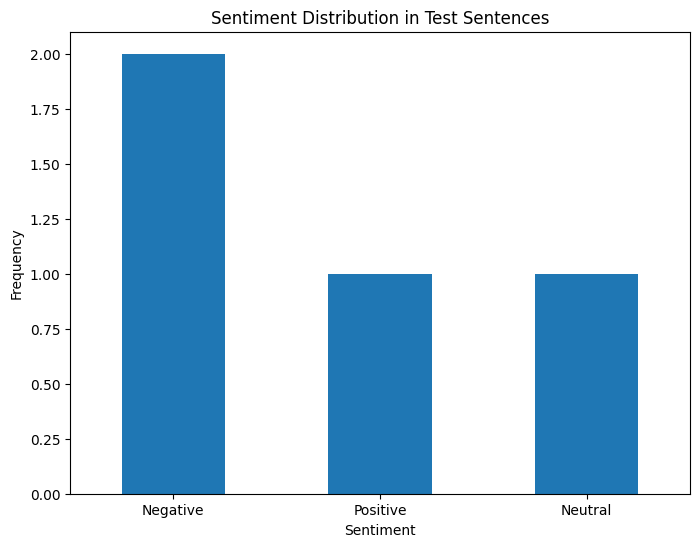

In [ ]:
import matplotlib.pyplot as plt


sentiment_counts = test_df['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Distribution in Test Sentences")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# data prep
#  'ENGLISH_clean' and 'AFRIKAANS_clean' contain cleaned text, and 'SCORE_1' represents sentiment (0 = Positive, 1 = Negative, 2 = Neutral)
df_cleaned = df[['ENGLISH_clean', 'AFRIKAANS_clean', 'SCORE_1']].dropna()

# Combine English and Afrikaans into one column and use SCORE_1 as the target label
df_cleaned['text'] = df_cleaned['ENGLISH_clean'] + " " + df_cleaned['AFRIKAANS_clean']
X = df_cleaned['text']
y = df_cleaned['SCORE_1']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Performance:
Accuracy: 0.765
Classification Report:
               precision    recall  f1-score   support

    Positive       0.74      0.92      0.82       116
    Negative       0.93      0.79      0.85        48
     Neutral       0.53      0.22      0.31        36

    accuracy                           0.77       200
   macro avg       0.73      0.65      0.66       200
weighted avg       0.75      0.77      0.74       200



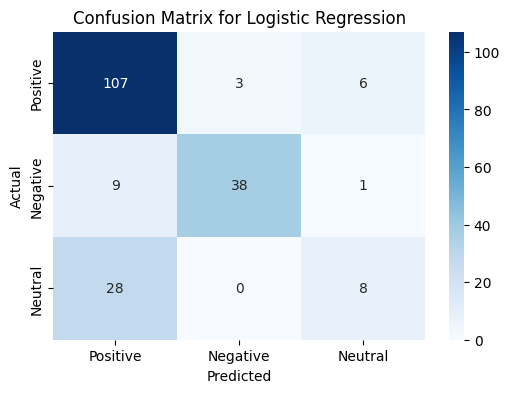


Random Forest Performance:
Accuracy: 0.725
Classification Report:
               precision    recall  f1-score   support

    Positive       0.70      0.95      0.80       116
    Negative       1.00      0.58      0.74        48
     Neutral       0.50      0.19      0.28        36

    accuracy                           0.72       200
   macro avg       0.73      0.58      0.61       200
weighted avg       0.73      0.72      0.69       200



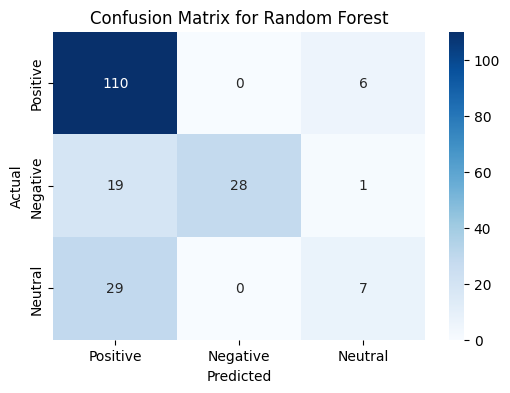


Naive Bayes Performance:
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

    Positive       0.77      0.84      0.81       116
    Negative       0.80      0.85      0.83        48
     Neutral       0.59      0.36      0.45        36

    accuracy                           0.76       200
   macro avg       0.72      0.69      0.69       200
weighted avg       0.75      0.76      0.75       200



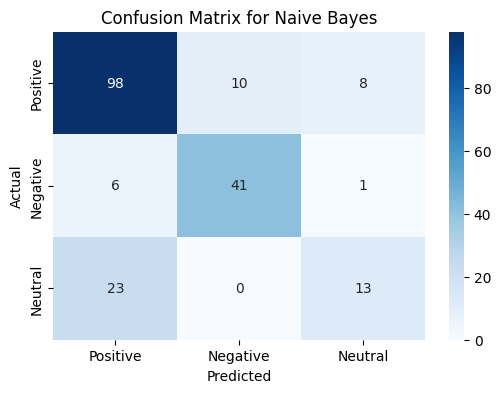

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

for model_name, model in models.items():

    model.fit(X_train_vect, y_train)


    y_pred = model.predict(X_test_vect)


    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Positive", "Negative", "Neutral"]))


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative", "Neutral"], yticklabels=["Positive", "Negative", "Neutral"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
from sklearn.svm import SVC

# Train and evaluate SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_vect, y_train)
y_pred_svm = svm_model.predict(X_test_vect)
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=["Positive", "Negative", "Neutral"]))

SVM Performance:
Accuracy: 0.765
Classification Report:
               precision    recall  f1-score   support

    Positive       0.77      0.87      0.82       116
    Negative       0.86      0.77      0.81        48
     Neutral       0.58      0.42      0.48        36

    accuracy                           0.77       200
   macro avg       0.74      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



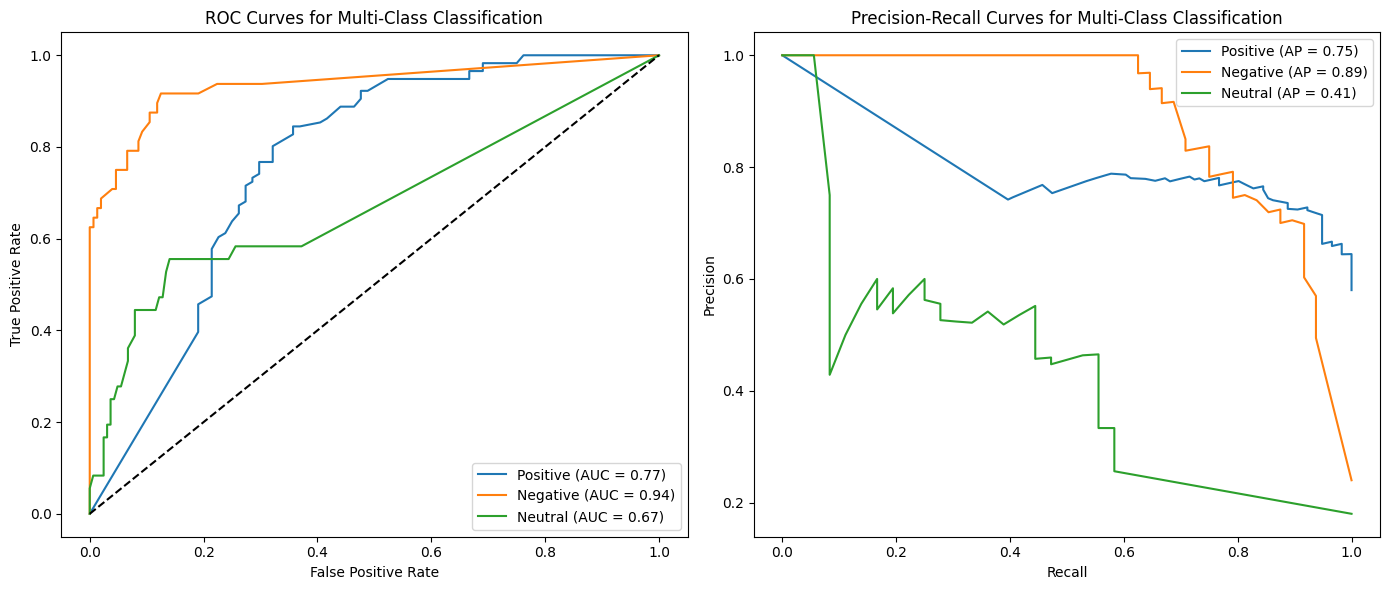

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Binarize the labels for multi-class evaluation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]


y_score = models["Random Forest"].predict_proba(X_test_vect)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
for i, label in enumerate(["Positive", "Negative", "Neutral"]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multi-Class Classification")
plt.legend(loc="lower right")

# Precision-Recall Curves
plt.subplot(1, 2, 2)
for i, label in enumerate(["Positive", "Negative", "Neutral"]):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f"{label} (AP = {average_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for Multi-Class Classification")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

<Figure size 4000x3000 with 0 Axes>

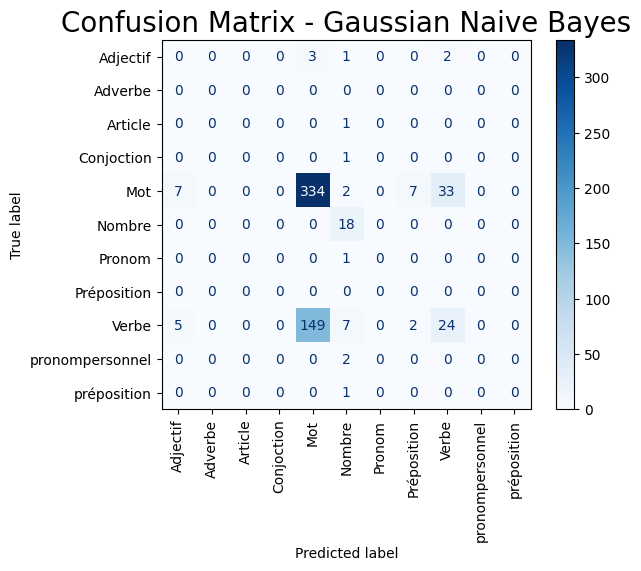

Accuracy: 0.627
Precision: 0.58
Recall: 0.63
F1 Score: 0.57

Classification Report:
                 precision    recall  f1-score   support

       Adjectif       0.00      0.00      0.00         6
        Article       0.00      0.00      0.00         1
     Conjoction       0.00      0.00      0.00         1
            Mot       0.69      0.87      0.77       383
         Nombre       0.53      1.00      0.69        18
         Pronom       0.00      0.00      0.00         1
          Verbe       0.41      0.13      0.20       187
pronompersonnel       0.00      0.00      0.00         2
    préposition       0.00      0.00      0.00         1

      micro avg       0.64      0.63      0.63       600
      macro avg       0.18      0.22      0.18       600
   weighted avg       0.58      0.63      0.57       600



In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, classification_report,
                             precision_score, recall_score, f1_score)

# Load the dataset
df = pd.read_excel("/Dataset _cleaned.xlsx")

df.columns = ['ciluba', 'french', 'english', 'afrikaans', 'sepedi', 'zulu', 'score', 'sentiment', 'nature']

# Encodes the 'sentiment' and 'nature' columns into numerical labels
label_encoder_sentiment = LabelEncoder()
df['sentiment_encoded'] = label_encoder_sentiment.fit_transform(df['sentiment'])
label_encoder_nature = LabelEncoder()
df['nature_encoded'] = label_encoder_nature.fit_transform(df['nature'])

# Prepares features (X) and target (y)
X = df[['score', 'sentiment_encoded']]
y = df['nature_encoded']

# Scales the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Gaussian Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred = nb_model.predict(X_test)

# Decode the numerical labels for y_test and y_pred
y_test_decoded = label_encoder_nature.inverse_transform(y_test)
y_pred_decoded = label_encoder_nature.inverse_transform(y_pred)

# Compute confusion matrix
cm_nb = confusion_matrix(y_test_decoded, y_pred_decoded, labels=label_encoder_nature.classes_)

#Plot the confusion matrix heatmap
plt.figure(figsize=(40, 30))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=label_encoder_nature.classes_)
disp.plot(cmap='Blues', values_format='d', xticks_rotation='vertical')
plt.title('Confusion Matrix - Gaussian Naive Bayes', fontsize=20)
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)

# Calculate precision, recall, and F1 scores
precision = precision_score(y_test_decoded, y_pred_decoded, average='weighted', zero_division=0)  # Handle division by zero
recall = recall_score(y_test_decoded, y_pred_decoded, average='weighted', zero_division=0)
f1 = f1_score(y_test_decoded, y_pred_decoded, average='weighted')

# Print the evaluation metrics scores
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print classification report with labels that exist in test data
print("\nClassification Report:")
unique_labels_in_test = sorted(set(y_test_decoded))
print(classification_report(y_test_decoded, y_pred_decoded, labels=unique_labels_in_test, zero_division=0))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best hyperparameters: {'var_smoothing': 1.0}


<Figure size 4000x3000 with 0 Axes>

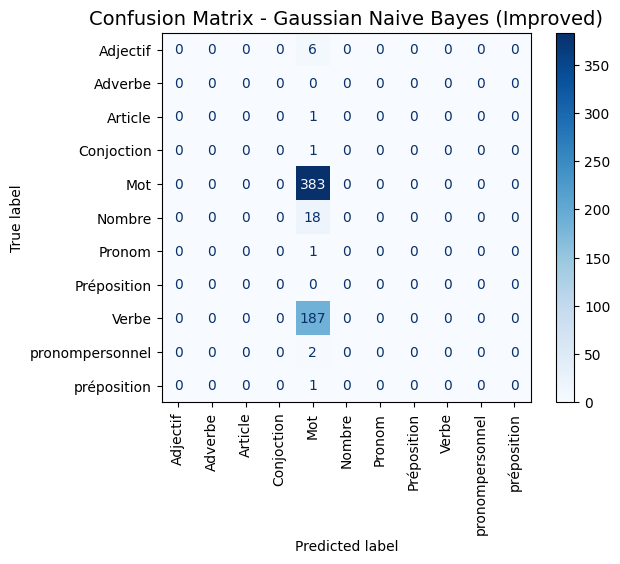

Accuracy: 0.638
Precision: 0.41
Recall: 0.64
F1 Score: 0.50

Classification Report:
                 precision    recall  f1-score   support

       Adjectif       0.00      0.00      0.00         6
        Article       0.00      0.00      0.00         1
     Conjoction       0.00      0.00      0.00         1
            Mot       0.64      1.00      0.78       383
         Nombre       0.00      0.00      0.00        18
         Pronom       0.00      0.00      0.00         1
          Verbe       0.00      0.00      0.00       187
pronompersonnel       0.00      0.00      0.00         2
    préposition       0.00      0.00      0.00         1

       accuracy                           0.64       600
      macro avg       0.07      0.11      0.09       600
   weighted avg       0.41      0.64      0.50       600



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, classification_report,
                             precision_score, recall_score, f1_score)

# Encode the 'sentiment' and 'nature' columns into numerical labels
label_encoder_sentiment = LabelEncoder()
df['sentiment_encoded'] = label_encoder_sentiment.fit_transform(df['sentiment'])
label_encoder_nature = LabelEncoder()
df['nature_encoded'] = label_encoder_nature.fit_transform(df['nature'])

# Convert 'score' to numeric, if it’s not already
df['score'] = pd.to_numeric(df['score'], errors='coerce').fillna(0)

# Prepare features (X) and target (y)
X = df[['score', 'sentiment_encoded']]
y = df['nature_encoded']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=nb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=10,  # Increased folds for better evaluation
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Decode the numerical labels for y_test and y_pred
y_test_decoded = label_encoder_nature.inverse_transform(y_test)
y_pred_decoded = label_encoder_nature.inverse_transform(y_pred)

# Compute confusion matrix
cm_nb = confusion_matrix(y_test_decoded, y_pred_decoded, labels=label_encoder_nature.classes_)

# Save the confusion matrix plot as a PNG file with larger dimensions
plt.figure(figsize=(40, 30))  # Large figure size
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=label_encoder_nature.classes_)
disp.plot(cmap='Blues', values_format='d', xticks_rotation='vertical')  # Set x-axis labels to horizontal
plt.title('Confusion Matrix - Gaussian Naive Bayes (Improved)', fontsize=14)
plt.show()

# Calculate evaluation metrics scores
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
precision = precision_score(y_test_decoded, y_pred_decoded, average='weighted', zero_division=0)
recall = recall_score(y_test_decoded, y_pred_decoded, average='weighted', zero_division=0)
f1 = f1_score(y_test_decoded, y_pred_decoded, average='weighted')

# Print the evaluation metrics scores
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded, zero_division=0))


ML FOR ZULU

In [ ]:
#random forest on predicting sentiment on sentences and word dataset
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the datasets
sentences_df = pd.read_excel('Sentences dataset (3).xlsx')
cleaned_data_df = pd.read_excel('Dataset _cleaned.xlsx')

# Define the function to preprocess and run Random Forest on each dataset
def random_forest_model(features, target, dataset_name):
    # Encode target labels
    label_encoder = LabelEncoder()
    target_encoded = label_encoder.fit_transform(target)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

    # Vectorize the text data using TF-IDF
    tfidf = TfidfVectorizer(max_features=1000)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # Initialize and train the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_tfidf, y_train)

    # Make predictions and generate the classification report
    y_pred = rf_model.predict(X_test_tfidf)
    unique_classes = sorted(set(y_test))
    report = classification_report(y_test, y_pred, labels=unique_classes, target_names=label_encoder.inverse_transform(unique_classes))

    print(f"Classification Report for {dataset_name}:\n", report)

# Process and run the model for the Sentences dataset
print("Processing Sentences Dataset...")
sentences_features = sentences_df['ENGLISH'].fillna('')
sentences_target = sentences_df['SENTIMENT'].fillna('')
random_forest_model(sentences_features, sentences_target, "Sentences Dataset")

# Process and run the model for the Cleaned dataset
print("\nProcessing Cleaned Dataset...")
cleaned_features = cleaned_data_df['ENGLISH'].fillna('')
cleaned_target = cleaned_data_df['SENTIMENT'].fillna('')
random_forest_model(cleaned_features, cleaned_target, "Cleaned Dataset")


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel ('/content/Dataset _cleaned.xlsx')
sentences_text_df = pd.read_excel('/content/Sentences dataset.xlsx')

# DISPLAY
print("Sentences Dataset:")
print(sentences_text_df.head())

print("\nDictionary Dataset:")
print(df.head())

# Confirm the cleaned column names
print("Cleaned Sentences Dataset Columns:")
print(sentences_text_df.columns)

print("\nCleaned Dictionary Dataset Columns:")
print(df.columns)

# Confirm the sentiment categories in both datasets
sentiment_categories_sentences = sentences_text_df['SENTIMENT'].unique()
sentiment_categories_dictionary = df['SENTIMENT'].unique()

# Display the unique sentiment categories
print("Sentiment Categories in Sentences Dataset:")
print(sentiment_categories_sentences)

print("\nSentiment Categories in Dictionary Dataset:")
print(sentiment_categories_dictionary)

# Define a mapping to standardize sentiment categories
sentiment_mapping = {
    'Negatif': 'Negatif',
    'Positif': 'Positif',
    'Neutral': 'Neutre',  # Assuming you want to convert Neutral to Neutre
    'Positif ': 'Positif',
    'Negatif ': 'Negatif',
    'Neutral ': 'Neutre',
    'posifif': 'Positif',
    'positif': 'Positif',
}

# Clean the sentiment categories in the Sentences Dataset
sentences_text_df['SENTIMENT'] = sentences_text_df['SENTIMENT'].str.strip()  # Strip whitespace
sentences_text_df['SENTIMENT'] = sentences_text_df['SENTIMENT'].replace(sentiment_mapping)

# Confirm the cleaned sentiment categories
cleaned_sentiment_categories = sentences_text_df['SENTIMENT'].unique()
print("Cleaned Sentiment Categories in Sentences Dataset:")
print(cleaned_sentiment_categories)


Sentences Dataset:
   French           ENGLISH           AFRIKAANS                        SEPEDI  \
0     NaN    Disorder pity.     Wanorde jammer.  Tlhakatlhakano kwelobohloko.   
1     NaN  Imbecility hate.  Imbesiliteit haat.             Setlaela lehloyo.   
2     NaN       Shake miss.           Skud mis.                 šikinya phoša   
3     NaN        Hate miss.           Haat mis.                 Lehloyo phoša   
4     NaN         Pity hit.        Jammer tref.          Kwelobohloko e otla.   

                  ZULU SENTIMENT  SCORE_1  
0  Inyakanyaka isihawu   Negatif        1  
1      Ubuwula inzondo   Negatif        1  
2    Shukuza nkosazana   Negatif        1  
3    Inzondo nkosazana   Negatif        1  
4        Isihawu shaya   Negatif        1  

Dictionary Dataset:
      Ciluba    FRANCAIS      ENGLISH  Afrikaans        Sepedi  \
0      Akaja     Arrangé      Arrange        Reël     Beakanya   
1  Akajilula  Réarranger    Rearrange     Herreël     Beakanya   
2      Akul

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Clean the sentiment in sentences_text_df
sentences_text_df['SENTIMENT'] = sentences_text_df['SENTIMENT'].str.strip()  # Remove extra spaces

# Filter relevant columns
X = sentences_text_df['ZULU']  # Features: Zulu sentences
y = sentences_text_df['SENTIMENT']  # Labels: Actual sentiment

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Create a DataFrame to hold actual and predicted sentiments
results_df = pd.DataFrame({
    'Actual Sentiment': y_test.values,
    'Predicted Sentiment': y_pred
})

# Display the results
print("Actual vs Predicted Sentiments:")
print(results_df.head(20))




              precision    recall  f1-score   support

     Negatif       0.81      0.70      0.75        50
      Neutre       0.73      0.22      0.34        36
     Positif       0.71      0.91      0.80       114

    accuracy                           0.73       200
   macro avg       0.75      0.61      0.63       200
weighted avg       0.74      0.73      0.71       200

Actual vs Predicted Sentiments:
   Actual Sentiment Predicted Sentiment
0           Positif             Positif
1           Positif             Positif
2           Positif             Negatif
3           Positif             Positif
4           Positif             Positif
5           Positif             Negatif
6           Negatif             Positif
7           Positif             Positif
8           Positif             Positif
9            Neutre             Positif
10          Positif             Positif
11          Positif             Positif
12          Positif             Positif
13          Positif        

In [ ]:
COMPARISON BETWEEN THE DIFFERENT MACHINE LEARNING MODELS

In [ ]:
#import libraries
import numpy as np
import pandas as pd

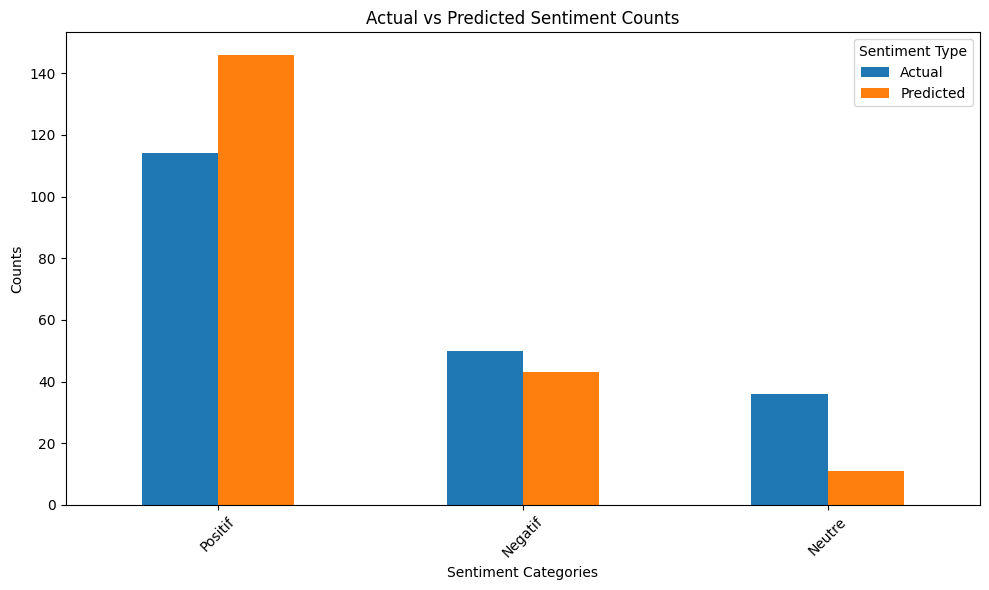

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of actual and predicted sentiments
actual_counts = results_df['Actual Sentiment'].value_counts()
predicted_counts = results_df['Predicted Sentiment'].value_counts()

# Create a DataFrame for plotting
counts_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
}).fillna(0)

# Create a bar plot
counts_df.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Actual vs Predicted Sentiment Counts')
plt.xlabel('Sentiment Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Type')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
COMPARISON BETWEEN THE DIFFERENT MACHINE LEARNING MODELS

In [ ]:
#import libraries
import numpy as np
import pandas as pd

In [ ]:
dataFrame = df

In [ ]:
#display the dataframe
dataFrame

In [ ]:
# Remove any leading/trailing whitespace from column names
dataFrame['SENTIMENT'] = dataFrame['SENTIMENT'].str.strip()

# Convert all string entries in the DataFrame to lowercase
dataFrame = dataFrame.map(lambda x: x.lower() if isinstance(x, str) else x)

# Display the updated DataFrame
print(dataFrame)

# Define text and label
text = dataFrame['ENGLISH']  # Extract the 'ENGLISH' column for text data
label = dataFrame['SENTIMENT']  # Extract the 'Sentiment' column for labels


In [ ]:
#The english sentences
EnglishSentences = dataFrame['ENGLISH']
EnglishSentences

#The Zulu Sentences
ZuluSentences = dataFrame['ZULU']
ZuluSentences

#The Afrikaans Sentences
AfrikaansSentences = dataFrame['AFRIKAANS']
AfrikaansSentences

#The Sepedi Sentences
SepediSentences = dataFrame['SEPEDI']
SepediSentences


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(EnglishSentences)  # Transform the list of sentences into a TF-IDF matrix
y = dataFrame['SENTIMENT']

#Split the data into the training and testing sets
from sklearn.model_selection import train_test_split

print("Length of X:", X.shape[0])
print("Length of y:", len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(y)  # Use 'y' instead of 'label'


# Encode y_train and y_test using the same LabelEncoder instance
y_train_labels = label_encoder.transform(y_train)  # Encode training labels
y_test_labels = label_encoder.transform(y_test)    # Encode testing labels


In [ ]:
#THE MODELS
#FOR ZULU
#CNN
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Define text and label
text = ZuluSentences  # Extract the 'ZULU' column for text data
y = dataFrame['SCORE']  # Extract the 'SCORE' column for labels


# Check unique labels in the dataset
#print("Unique labels in dataset:", label_encoder.classes_)

# Get the number of unique classes
num_classes = len(np.unique(y))

# Parameters
vocab_size = 2000
embedding_dim = 100
max_length = 100
num_filters = 128
kernel_size = 5
dropout_rate = 0.5
batch_size = 32
epochs = 30

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text)
X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxlen=max_length, padding='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(dropout_rate),
    Dense(10, activation='relu'),
    Dense(num_classes, activation='softmax')  # Use softmax for multiclass classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Prediction
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Decode to original labels (ensure y_pred_cnn is compatible with label_encoder)
try:
    y_pred_cnn_decoded = label_encoder.inverse_transform(y_pred_cnn)
except ValueError as e:
    print("Error during inverse transform:", e)
    print("Predicted classes:", np.unique(y_pred_cnn))

# Decode the true labels
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_cnn_decoded))

# Define the first three classes to include in the confusion matrix
selected_classes = label_encoder.classes_[:3]  # Only take the first three classes

# Filter y_test_decoded and y_pred_cnn_decoded for only the selected classes
y_test_filtered = [label for label in y_test_decoded if label in selected_classes]
y_pred_filtered = [label for label, true_label in zip(y_pred_cnn_decoded, y_test_decoded) if true_label in selected_classes]

# Confusion Matrix with filtered classes
conf_matrix = confusion_matrix(y_test_filtered, y_pred_filtered, labels=selected_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=selected_classes)
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title('Confusion Matrix for Zulu CNN')
plt.show()

print("Accuracy:", accuracy_score(y_test_filtered, y_pred_filtered))

# Decode the tokenized test sequences back to text
decoded_sentences = tokenizer.sequences_to_texts(X_test)

# Create a DataFrame with the decoded sentences and their predicted labels
results_df = pd.DataFrame({
    'Sentence': decoded_sentences,
    'Predicted Label': y_pred_cnn,
    'Actual Label': y_test
})

# Display the results as a table
print("\nTest Sentences with Predictions:\n")
print(results_df.head(10))


In [ ]:
# NAIVE BAYES
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming ZuluSentences and dataFrame are already defined
texts = ZuluSentences
y = dataFrame['SENTIMENT']  # Replace 'SENTIMENT' if 'SCORE_1' is the correct column

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(
    X, y_encoded, texts, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Get unique labels present in y_test
unique_labels_in_test = np.unique(y_test)
filtered_target_names = [label_encoder.classes_[i] for i in unique_labels_in_test]

# Detailed classification report
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=filtered_target_names))

# Predictions in original labels
y_pred_nb = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Create a DataFrame to display predictions, actual values, and the text
results_df = pd.DataFrame({
    'Sentence': texts_test[:10],  # The original sentences used in testing
    'Prediction': y_pred_nb[:10],  # First 10 predictions
    'Actual': y_test_decoded[:10]
})

# Display the DataFrame
print("\nTest Sentences with Predictions:\n")
print(results_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_labels_in_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=filtered_target_names, yticklabels=filtered_target_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for the Zulu Naive Bayes Model")
plt.show()

In [ ]:
#LSTM
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# Assuming EnglishSentences and y are already defined
texts = ZuluSentences
labels = y

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a simple neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

In [ ]:
#SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Assume your Zulu sentences data is loaded in `AfrikaansSentences` and the DataFrame `dataFrame` contains labels in 'SCORE'

# Zulu Sentences
texts = ZuluSentences
y = dataFrame['SCORE']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels as integers

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels if desired
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Decode predictions and actual labels to original labels for readability
y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

# Create a DataFrame for better visualization with class names
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix for Zulu SVM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test_decoded, y_pred_decoded))

print("Accuracy:", svm_model.score(X_test, y_test))

# Create a DataFrame with test sentences and their predictions
results_df = pd.DataFrame({
    'Test Sentence': [texts[i] for i in X_test.argmax(axis=1)],  # Extracts original sentences for test set indices
    'Actual Label': y_test_decoded,
    'Predicted Label': y_pred_decoded
})

# Display the DataFrame
print("\nTest Sentences with Predictions:\n")
print(results_df.head(10))  # Display first 10 rows for quick view

In [ ]:
#FOR SEPEDI
#CNN
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Define text and label
text = SepediSentences  # Extract the 'ZULU' column for text data
y = dataFrame['SCORE']  # Extract the 'SCORE' column for labels


# Check unique labels in the dataset
#print("Unique labels in dataset:", label_encoder.classes_)

# Get the number of unique classes
num_classes = len(np.unique(y))

# Parameters
vocab_size = 2000
embedding_dim = 100
max_length = 100
num_filters = 128
kernel_size = 5
dropout_rate = 0.5
batch_size = 32
epochs = 30

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text)
X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxlen=max_length, padding='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(dropout_rate),
    Dense(10, activation='relu'),
    Dense(num_classes, activation='softmax')  # Use softmax for multiclass classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Prediction
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Decode to original labels (ensure y_pred_cnn is compatible with label_encoder)
try:
    y_pred_cnn_decoded = label_encoder.inverse_transform(y_pred_cnn)
except ValueError as e:
    print("Error during inverse transform:", e)
    print("Predicted classes:", np.unique(y_pred_cnn))

# Decode the true labels
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_cnn_decoded))

# Define the first three classes to include in the confusion matrix
selected_classes = label_encoder.classes_[:3]  # Only take the first three classes

# Filter y_test_decoded and y_pred_cnn_decoded for only the selected classes
y_test_filtered = [label for label in y_test_decoded if label in selected_classes]
y_pred_filtered = [label for label, true_label in zip(y_pred_cnn_decoded, y_test_decoded) if true_label in selected_classes]

# Confusion Matrix with filtered classes
conf_matrix = confusion_matrix(y_test_filtered, y_pred_filtered, labels=selected_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=selected_classes)
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title('Confusion Matrix for Sepedi CNN Model')
plt.show()

print("Accuracy:", accuracy_score(y_test_filtered, y_pred_filtered))

# Decode the tokenized test sequences back to text
decoded_sentences = tokenizer.sequences_to_texts(X_test)

# Create a DataFrame with the decoded sentences and their predicted labels
results_df = pd.DataFrame({
    'Sentence': decoded_sentences,
    'Predicted Label': y_pred_cnn,
    'Actual Label': y_test
})

# Display the results as a table
print("\nTest Sentences with Predictions:\n")
print(results_df.head(10))


In [ ]:
# NAIVE BAYES
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming SepediSentences and dataFrame are already defined
texts = SepediSentences
y = dataFrame['SENTIMENT']  # Replace 'SENTIMENT' if 'SCORE_1' is the correct column

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(
    X, y_encoded, texts, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Get unique labels present in y_test
unique_labels_in_test = np.unique(y_test)
filtered_target_names = [label_encoder.classes_[i] for i in unique_labels_in_test]

# Detailed classification report
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=filtered_target_names))

# Predictions in original labels
y_pred_nb = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Create a DataFrame to display predictions, actual values, and the text
results_df = pd.DataFrame({
    'Sentence': texts_test[:10],  # The original sentences used in testing
    'Prediction': y_pred_nb[:10],  # First 10 predictions
    'Actual': y_test_decoded[:10]
})

# Display the DataFrame
print("\nTest Sentences with Predictions:\n")
print(results_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_labels_in_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=filtered_target_names, yticklabels=filtered_target_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for the Sepedi Naive Bayes Model")
plt.show()

In [ ]:
#LSTM
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

# Assuming EnglishSentences and y are already defined
texts = SepediSentences
labels = y

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a simple neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Make predictions
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Decode the true labels
y_test_decoded = np.argmax(y_test, axis=1)  # Convert one-hot to class labels
y_test_labels = label_encoder.inverse_transform(y_test_decoded)  # Decode to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)  # Decode predicted labels

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Create a DataFrame for better visualization with class names
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges', cbar=True, linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix for the Sepedi LSTM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()

# Create a DataFrame with test sentences and their predictions
results_df = pd.DataFrame({
    'Test Sentence': [texts[i] for i in range(len(X_test))],  # Extract original sentences
    'Actual Label': y_test_labels,
    'Predicted Label': y_pred_labels
})

# Display the DataFrame
print("\nTest Sentences with Predictions:\n")
print(results_df.head(10))  # Display first 10 rows for quick view

print("Test Accuracy:", accuracy)


In [ ]:
#SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Assume your Zulu sentences data is loaded in `AfrikaansSentences` and the DataFrame `dataFrame` contains labels in 'SCORE'

# Sepedi Sentences
texts = SepediSentences
y = dataFrame['SCORE']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels as integers

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels if desired
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Decode predictions and actual labels to original labels for readability
y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

# Create a DataFrame for better visualization with class names
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix for Sepedi SVM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test_decoded, y_pred_decoded))

print("Accuracy:", svm_model.score(X_test, y_test))


In [ ]:
#CNN
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Define text and label
text = AfrikaansSentences  # Extract the 'AFRIKAANS' column for text data
y = dataFrame['SCORE']  # Extract the 'SCORE' column for labels


# Check unique labels in the dataset
#print("Unique labels in dataset:", label_encoder.classes_)

# Get the number of unique classes
num_classes = len(np.unique(y))

# Parameters
vocab_size = 2000
embedding_dim = 100
max_length = 100
num_filters = 128
kernel_size = 5
dropout_rate = 0.5
batch_size = 32
epochs = 30

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text)
X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxlen=max_length, padding='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(dropout_rate),
    Dense(10, activation='relu'),
    Dense(num_classes, activation='softmax')  # Use softmax for multiclass classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Prediction
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Decode to original labels (ensure y_pred_cnn is compatible with label_encoder)
try:
    y_pred_cnn_decoded = label_encoder.inverse_transform(y_pred_cnn)
except ValueError as e:
    print("Error during inverse transform:", e)
    print("Predicted classes:", np.unique(y_pred_cnn))

# Decode the true labels
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_cnn_decoded))

# Define the first three classes to include in the confusion matrix
selected_classes = label_encoder.classes_[:3]  # Only take the first three classes

# Filter y_test_decoded and y_pred_cnn_decoded for only the selected classes
y_test_filtered = [label for label in y_test_decoded if label in selected_classes]
y_pred_filtered = [label for label, true_label in zip(y_pred_cnn_decoded, y_test_decoded) if true_label in selected_classes]

# Confusion Matrix with filtered classes
conf_matrix = confusion_matrix(y_test_filtered, y_pred_filtered, labels=selected_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=selected_classes)
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title('Confusion Matrix for Afrikaans CNN Model')
plt.show()

print("Accuracy:", accuracy_score(y_test_filtered, y_pred_filtered))


In [ ]:
# Decode the tokenized test sequences back to text
decoded_sentences = tokenizer.sequences_to_texts(X_test)

# Create a DataFrame with the decoded sentences and their predicted labels
results_df = pd.DataFrame({
    'Sentence': decoded_sentences,
    'Predicted Label': y_pred_cnn,
    'Actual': y_test
})

# Display the results as a table
print("\nTest Sentences with Predictions:\n")
print(results_df.head(10))


In [ ]:
#SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Assume your Zulu sentences data is loaded in `AfrikaansSentences` and the DataFrame `dataFrame` contains labels in 'SCORE'

# Zulu Sentences (Replace AfrikaansSentences with your actual text data variable)
texts = AfrikaansSentences
y = dataFrame['SCORE']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels as integers

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels if desired
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Decode predictions and actual labels to original labels for readability
y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

# Create a DataFrame for better visualization with class names
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix for Afrikaans SVM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test_decoded, y_pred_decoded))

print("Accuracy:", svm_model.score(X_test, y_test))


In [ ]:
# Create a DataFrame with test sentences and their predictions
results_df = pd.DataFrame({
    'Test Sentence': [texts[i] for i in X_test.argmax(axis=1)],  # Extracts original sentences for test set indices
    'Actual Label': y_test_decoded,
    'Predicted Label': y_pred_decoded
})

# Display the DataFrame
print("\nTest Sentences with Predictions:\n")
print(results_df.head(10))  # Display first 10 rows for quick view


In [ ]:
# NAIVE BAYES
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming AfrikaansSentences and dataFrame are already defined
texts = AfrikaansSentences
y = dataFrame['SENTIMENT']  # Replace 'SENTIMENT' if 'SCORE_1' is the correct column

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(
    X, y_encoded, texts, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Get unique labels present in y_test
unique_labels_in_test = np.unique(y_test)
filtered_target_names = [label_encoder.classes_[i] for i in unique_labels_in_test]

# Detailed classification report
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=filtered_target_names))

# Predictions in original labels
y_pred_nb = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Create a DataFrame to display predictions, actual values, and the text
results_df = pd.DataFrame({
    'Sentence': texts_test[:10],  # The original sentences used in testing
    'Prediction': y_pred_nb[:10],  # First 10 predictions
    'Actual': y_test_decoded[:10]
})

# Display the DataFrame
print("\nTest Sentences with Predictions:\n")
print(results_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_labels_in_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=filtered_target_names, yticklabels=filtered_target_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for the Afrikaans Naive Bayes Model")
plt.show()

In [ ]:
#LSTM
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

# Assuming EnglishSentences and y are already defined
texts = AfrikaansSentences
labels = y

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a simple neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Make predictions
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Decode the true labels
y_test_decoded = np.argmax(y_test, axis=1)  # Convert one-hot to class labels
y_test_labels = label_encoder.inverse_transform(y_test_decoded)  # Decode to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)  # Decode predicted labels

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Create a DataFrame for better visualization with class names
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges', cbar=True, linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix for the Afrikaans LSTM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()

# Create a DataFrame with test sentences and their predictions
results_df = pd.DataFrame({
    'Test Sentence': [texts[i] for i in range(len(X_test))],  # Extract original sentences
    'Actual Label': y_test_labels,
    'Predicted Label': y_pred_labels
})

# Display the DataFrame
print("\nTest Sentences with Predictions:\n")
print(results_df.head(10))  # Display first 10 rows for quick view
print("Test Accuracy:", accuracy)


In [ ]:
#ENGLISH
#CNN
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Define text and label
text = EnglishSentences  # Extract the 'AFRIKAANS' column for text data
y = dataFrame['SCORE']  # Extract the 'SCORE' column for labels


# Check unique labels in the dataset
#print("Unique labels in dataset:", label_encoder.classes_)

# Get the number of unique classes
num_classes = len(np.unique(y))

# Parameters
vocab_size = 2000
embedding_dim = 100
max_length = 100
num_filters = 128
kernel_size = 5
dropout_rate = 0.5
batch_size = 32
epochs = 30

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text)
X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxlen=max_length, padding='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(dropout_rate),
    Dense(10, activation='relu'),
    Dense(num_classes, activation='softmax')  # Use softmax for multiclass classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Prediction
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Decode to original labels (ensure y_pred_cnn is compatible with label_encoder)
try:
    y_pred_cnn_decoded = label_encoder.inverse_transform(y_pred_cnn)
except ValueError as e:
    print("Error during inverse transform:", e)
    print("Predicted classes:", np.unique(y_pred_cnn))

# Decode the true labels
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_cnn_decoded))

# Define the first three classes to include in the confusion matrix
selected_classes = label_encoder.classes_[:3]  # Only take the first three classes

# Filter y_test_decoded and y_pred_cnn_decoded for only the selected classes
y_test_filtered = [label for label in y_test_decoded if label in selected_classes]
y_pred_filtered = [label for label, true_label in zip(y_pred_cnn_decoded, y_test_decoded) if true_label in selected_classes]

# Confusion Matrix with filtered classes
conf_matrix = confusion_matrix(y_test_filtered, y_pred_filtered, labels=selected_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=selected_classes)
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title('Confusion Matrix for English CNN Model')
plt.show()

print("Accuracy:", accuracy_score(y_test_filtered, y_pred_filtered))


In [ ]:
# Decode the tokenized test sequences back to text
decoded_sentences = tokenizer.sequences_to_texts(X_test)

# Create a DataFrame with the decoded sentences and their predicted labels
results_df = pd.DataFrame({
    'Sentence': decoded_sentences,
    'Predicted Label': y_pred_cnn,
    'Actual': y_test
})

# Display the results as a table
print("\nTest Sentences with Predictions:\n")
print(results_df.head(10))


In [ ]:
#SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Assume your Zulu sentences data is loaded in `AfrikaansSentences` and the DataFrame `dataFrame` contains labels in 'SCORE'

# English Sentences
texts = EnglishSentences
y = dataFrame['SCORE']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels as integers

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels if desired
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Decode predictions and actual labels to original labels for readability
y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

# Create a DataFrame for better visualization with class names
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix for English SVM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test_decoded, y_pred_decoded))

print("Accuracy:", svm_model.score(X_test, y_test))

# Create a DataFrame with test sentences and their predictions
results_df = pd.DataFrame({
    'Test Sentence': [texts[i] for i in X_test.argmax(axis=1)],  # Extracts original sentences for test set indices
    'Actual Label': y_test_decoded,
    'Predicted Label': y_pred_decoded
})

# Display the DataFrame
print("\nTest Sentences with Predictions:\n")
print(results_df.head(10))  # Display first 10 rows for quick view


In [ ]:
# NAIVE BAYES
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming AfrikaansSentences and dataFrame are already defined
texts = EnglishSentences
y = dataFrame['SENTIMENT']  # Replace 'SENTIMENT' if 'SCORE_1' is the correct column

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(
    X, y_encoded, texts, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Get unique labels present in y_test
unique_labels_in_test = np.unique(y_test)
filtered_target_names = [label_encoder.classes_[i] for i in unique_labels_in_test]

# Detailed classification report
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=filtered_target_names))

# Predictions in original labels
y_pred_nb = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Create a DataFrame to display predictions, actual values, and the text
results_df = pd.DataFrame({
    'Sentence': texts_test[:10],  # The original sentences used in testing
    'Prediction': y_pred_nb[:10],  # First 10 predictions
    'Actual': y_test_decoded[:10]
})

# Display the DataFrame
print("\nTest Sentences with Predictions:\n")
print(results_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_labels_in_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=filtered_target_names, yticklabels=filtered_target_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for the English Naive Bayes Model")
plt.show()

In [ ]:
#LSTM
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

# Assuming EnglishSentences and y are already defined
texts = EnglishSentences
labels = y

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a simple neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Make predictions
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Decode the true labels
y_test_decoded = np.argmax(y_test, axis=1)  # Convert one-hot to class labels
y_test_labels = label_encoder.inverse_transform(y_test_decoded)  # Decode to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)  # Decode predicted labels

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Create a DataFrame for better visualization with class names
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges', cbar=True, linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix for the English LSTM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()

# Create a DataFrame with test sentences and their predictions
results_df = pd.DataFrame({
    'Test Sentence': [texts[i] for i in range(len(X_test))],  # Extract original sentences
    'Actual Label': y_test_labels,
    'Predicted Label': y_pred_labels
})

# Display the DataFrame
print("\nTest Sentences with Predictions:\n")
print(results_df.head(10))  # Display first 10 rows for quick view
print("Test Accuracy:", accuracy)


In [ ]:
XAI

In [ ]:
#XAI
#SEPEDI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.calibration import CalibratedClassifierCV
from lime.lime_text import LimeTextExplainer

# Assuming your Sepedi sentences data is loaded in SepediSentences and dataFrame contains labels in 'SCORE'
texts = SepediSentences
y = dataFrame['SCORE']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(X, y_encoded, texts, test_size=0.2, random_state=42)

# Train and calibrate the SVM model
svm_model = SVC(kernel='linear')
calibrated_svm_model = CalibratedClassifierCV(svm_model)
calibrated_svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = calibrated_svm_model.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix for SVM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_decoded, y_pred_decoded))
print("Accuracy:", calibrated_svm_model.score(X_test, y_test))

# Initialize LIME text explainer
explainer = LimeTextExplainer(class_names=label_encoder.classes_)

# Generate explanations for each test instance and visualize them
for i in range(5):  # Limit to first 5 examples for readability
    exp = explainer.explain_instance(
        texts_test.iloc[i],
        classifier_fn=lambda x: calibrated_svm_model.predict_proba(vectorizer.transform(x)),
        num_features=3
    )

    # Plot the explanation
    fig, ax = plt.subplots()
    contributions = dict(exp.as_list())
    feature_names = list(contributions.keys())
    feature_importances = list(contributions.values())

    # Bar plot for the LIME explanation
    ax.barh(feature_names, feature_importances, color="skyblue")
    ax.set_title(f'LIME Explanation for Test Sentence {i+1}')
    ax.set_xlabel('Contribution to Prediction')
    ax.invert_yaxis()
    plt.show()

    # Print the sentence, actual, and predicted label for context
    print(f"\nTest Sentence {i+1}: {texts_test.iloc[i]}")
    print(f"Actual Label: {y_test_decoded[i]}")
    print(f"Predicted Label: {y_pred_decoded[i]}")
    print("Explanation:", exp.as_list())
    print("-" * 50)


In [ ]:
#ZULU
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.calibration import CalibratedClassifierCV
from lime.lime_text import LimeTextExplainer

# Assuming your Sepedi sentences data is loaded in SepediSentences and dataFrame contains labels in 'SCORE'
texts = ZuluSentences
y = dataFrame['SCORE']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(X, y_encoded, texts, test_size=0.2, random_state=42)

# Train and calibrate the SVM model
svm_model = SVC(kernel='linear')
calibrated_svm_model = CalibratedClassifierCV(svm_model)
calibrated_svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = calibrated_svm_model.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix for SVM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_decoded, y_pred_decoded))
print("Accuracy:", calibrated_svm_model.score(X_test, y_test))

# Initialize LIME text explainer
explainer = LimeTextExplainer(class_names=label_encoder.classes_)

# Generate explanations for each test instance and visualize them
for i in range(5):  # Limit to first 5 examples for readability
    exp = explainer.explain_instance(
        texts_test.iloc[i],
        classifier_fn=lambda x: calibrated_svm_model.predict_proba(vectorizer.transform(x)),
        num_features=3
    )

    # Plot the explanation
    fig, ax = plt.subplots()
    contributions = dict(exp.as_list())
    feature_names = list(contributions.keys())
    feature_importances = list(contributions.values())

    # Bar plot for the LIME explanation
    ax.barh(feature_names, feature_importances, color="skyblue")
    ax.set_title(f'LIME Explanation for Test Sentence {i+1}')
    ax.set_xlabel('Contribution to Prediction')
    ax.invert_yaxis()
    plt.show()

    # Print the sentence, actual, and predicted label for context
    print(f"\nTest Sentence {i+1}: {texts_test.iloc[i]}")
    print(f"Actual Label: {y_test_decoded[i]}")
    print(f"Predicted Label: {y_pred_decoded[i]}")
    print("Explanation:", exp.as_list())
    print("-" * 50)


In [ ]:
#ENGLISH
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.calibration import CalibratedClassifierCV
from lime.lime_text import LimeTextExplainer

# Assuming your Sepedi sentences data is loaded in SepediSentences and dataFrame contains labels in 'SCORE'
texts = EnglishSentences
y = dataFrame['SCORE']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(X, y_encoded, texts, test_size=0.2, random_state=42)

# Train and calibrate the SVM model
svm_model = SVC(kernel='linear')
calibrated_svm_model = CalibratedClassifierCV(svm_model)
calibrated_svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = calibrated_svm_model.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix for SVM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_decoded, y_pred_decoded))
print("Accuracy:", calibrated_svm_model.score(X_test, y_test))

# Initialize LIME text explainer
explainer = LimeTextExplainer(class_names=label_encoder.classes_)

# Generate explanations for each test instance and visualize them
for i in range(5):  # Limit to first 5 examples for readability
    exp = explainer.explain_instance(
        texts_test.iloc[i],
        classifier_fn=lambda x: calibrated_svm_model.predict_proba(vectorizer.transform(x)),
        num_features=3
    )

    # Plot the explanation
    fig, ax = plt.subplots()
    contributions = dict(exp.as_list())
    feature_names = list(contributions.keys())
    feature_importances = list(contributions.values())

    # Bar plot for the LIME explanation
    ax.barh(feature_names, feature_importances, color="skyblue")
    ax.set_title(f'LIME Explanation for Test Sentence {i+1}')
    ax.set_xlabel('Contribution to Prediction')
    ax.invert_yaxis()
    plt.show()

    # Print the sentence, actual, and predicted label for context
    print(f"\nTest Sentence {i+1}: {texts_test.iloc[i]}")
    print(f"Actual Label: {y_test_decoded[i]}")
    print(f"Predicted Label: {y_pred_decoded[i]}")
    print("Explanation:", exp.as_list())
    print("-" * 50)


In [ ]:
#AFRIKAANS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.calibration import CalibratedClassifierCV
from lime.lime_text import LimeTextExplainer

# Assuming your Sepedi sentences data is loaded in SepediSentences and dataFrame contains labels in 'SCORE'
texts = AfrikaansSentences
y = dataFrame['SCORE']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(X, y_encoded, texts, test_size=0.2, random_state=42)

# Train and calibrate the SVM model
svm_model = SVC(kernel='linear')
calibrated_svm_model = CalibratedClassifierCV(svm_model)
calibrated_svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = calibrated_svm_model.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
cm_df = pd.DataFrame(conf_matrix,
                     index=label_encoder.classes_,
                     columns=label_encoder.classes_)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix for SVM Model')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_decoded, y_pred_decoded))
print("Accuracy:", calibrated_svm_model.score(X_test, y_test))

# Initialize LIME text explainer
explainer = LimeTextExplainer(class_names=label_encoder.classes_)

# Generate explanations for each test instance and visualize them
for i in range(5):  # Limit to first 5 examples for readability
    exp = explainer.explain_instance(
        texts_test.iloc[i],
        classifier_fn=lambda x: calibrated_svm_model.predict_proba(vectorizer.transform(x)),
        num_features=3
    )

    # Plot the explanation
    fig, ax = plt.subplots()
    contributions = dict(exp.as_list())
    feature_names = list(contributions.keys())
    feature_importances = list(contributions.values())

    # Bar plot for the LIME explanation
    ax.barh(feature_names, feature_importances, color="skyblue")
    ax.set_title(f'LIME Explanation for Test Sentence {i+1}')
    ax.set_xlabel('Contribution to Prediction')
    ax.invert_yaxis()
    plt.show()

    # Print the sentence, actual, and predicted label for context
    print(f"\nTest Sentence {i+1}: {texts_test.iloc[i]}")
    print(f"Actual Label: {y_test_decoded[i]}")
    print(f"Predicted Label: {y_pred_decoded[i]}")
    print("Explanation:", exp.as_list())
    print("-" * 50)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 31/31 [00:38<00:00,  1.23s/it]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 0
[LightGBM] [Info] Start training from score -1.165908
[LightGBM] [Info] Start training from score -1.929771
[LightGBM] [Info] Start training from score -0.610316
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet th

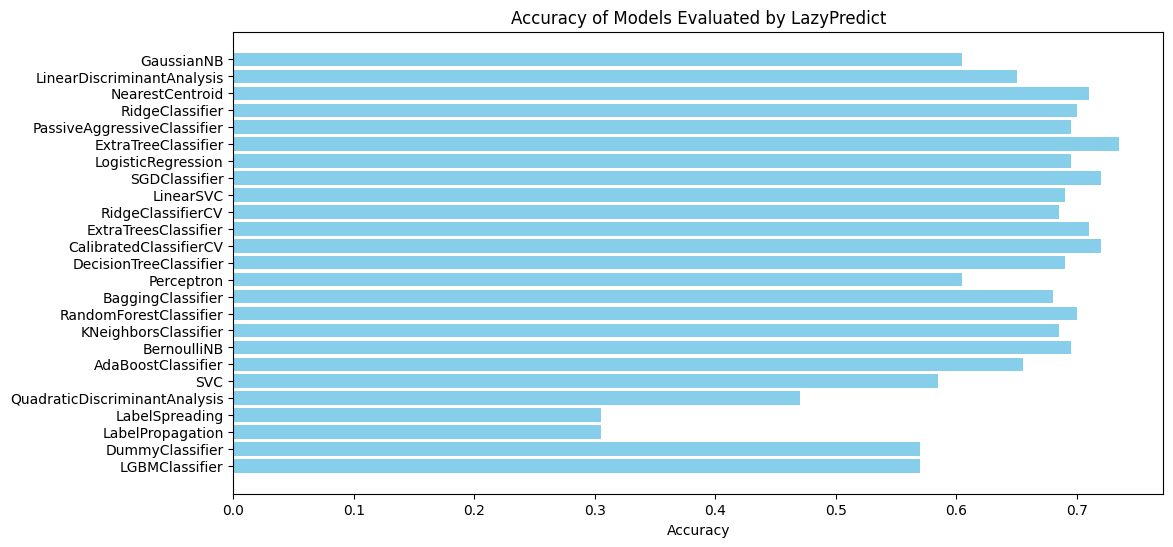

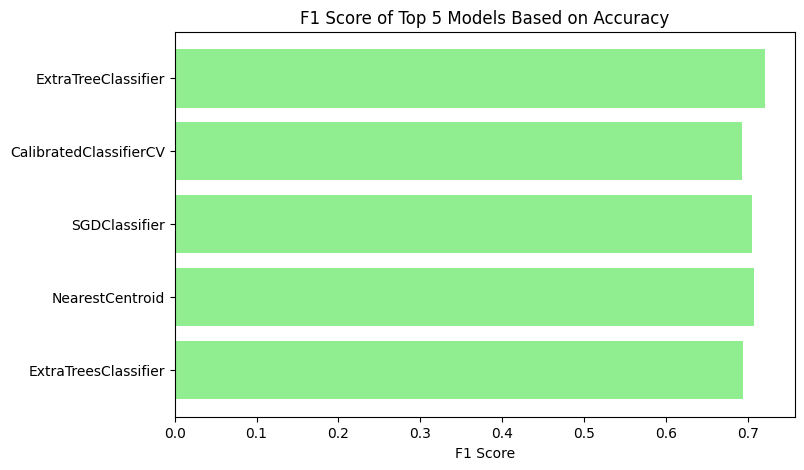


Best Model Selected: ExtraTreeClassifier


<Figure size 1000x800 with 0 Axes>

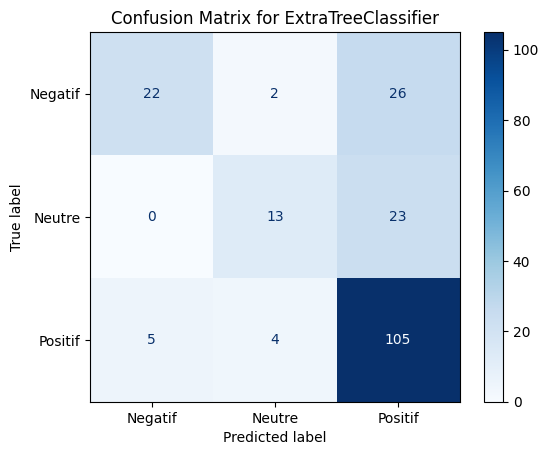

In [ ]:
#LAZY PREDICTION
# Install required libraries
!pip install lazypredict matplotlib scikit-learn

# Modify the Supervised.py file to change 'sparse' to 'sparse_output' // fix sparse error
!sed -i 's/sparse=False/sparse_output=False/g' /usr/local/lib/python3.10/dist-packages/lazypredict/Supervised.py

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Load the datasets
sentences_df = pd.read_excel('/content/Sentences dataset.xlsx')
dictionary_df = pd.read_excel('/content/Dataset _cleaned.xlsx')

# Clean and Standardize Sentiment Data
# Define a mapping to standardize sentiment categories
sentiment_mapping = {
    'Negatif': 'Negatif',
    'Positif': 'Positif',
    'Neutral': 'Neutre',  # Assuming you want to convert Neutral to Neutre
    'Positif ': 'Positif',
    'Negatif ': 'Negatif',
    'Neutral ': 'Neutre',
    'posifif': 'Positif',
    'positif': 'Positif',
}

# Apply the mapping to standardize the 'SENTIMENT' column
sentences_df['SENTIMENT'] = sentences_df['SENTIMENT'].str.strip().map(sentiment_mapping)

# Drop any rows where 'SENTIMENT' could not be mapped (if any)
sentences_df = sentences_df.dropna(subset=['SENTIMENT'])

# Prepare Data for Lazy Prediction
X = sentences_df['ZULU']
y = sentences_df['SENTIMENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction Using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert TF-IDF matrices to dense format as LazyPredict might need it
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Initialize LazyClassifier
clf = LazyClassifier()

# Fit the LazyClassifier on the training data
models, predictions = clf.fit(X_train_dense, X_test_dense, y_train, y_test)

# Display Model Performance
print("LazyPredict Model Performance:")
print(models)

# Analysis of Top Models
# Display the top 5 models based on Accuracy
top_models = models.sort_values(by="Accuracy", ascending=False).head(5)
print("\nTop 5 Models Based on Accuracy:")
print(top_models)



# Plot Accuracy of all models
plt.figure(figsize=(12, 6))
plt.barh(models.index, models['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Models Evaluated by LazyPredict')
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.show()

# Plot F1 Score of the top 5 models
top_5_f1 = top_models['F1 Score']
plt.figure(figsize=(8, 5))
plt.barh(top_5_f1.index, top_5_f1, color='lightgreen')
plt.xlabel('F1 Score')
plt.title('F1 Score of Top 5 Models Based on Accuracy')
plt.gca().invert_yaxis()
plt.show()

# Confusion Matrix for the Best Model
# Identify the best model based on accuracy
best_model_name = top_models.index[0]
print(f"\nBest Model Selected: {best_model_name}")

# Train and predict using the best model (assuming RandomForest as an example; replace as needed)
from sklearn.ensemble import RandomForestClassifier  # Example: replace with the actual best model class

best_model = RandomForestClassifier(random_state=42)  # Replace with best model
best_model.fit(X_train_dense, y_train)
y_pred = best_model.predict(X_test_dense)

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)

plt.figure(figsize=(10, 8))
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()